 <h1><center>Film Industry Investment Analysis</center></h1>

<div>
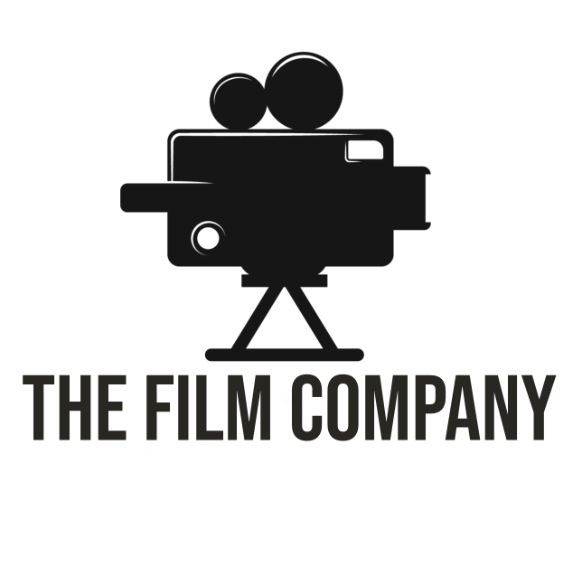
   </div>
<div style="text-align: center;">
<a href="https://www.vecteezy.com/free-vector/film-industry" style="font-size: 6px;">Film Industry Vectors by Vecteezy</a>
</div>

# **Overview**

This project analyzes which types of movies generate the most revenue at the box office. Descriptive analysis of movie data sets collected from Box Office Mojo, IMBD, Rotten Tomatoes, The Movie DB, and The Numbers, will highlight specific movie characteristics that increase ROI such as, studio location, film rating (R, PG, etc), and movie genre. This analysis can be used by the company to decide in which location to build a studio and help the company's new movie studio operate with the lowest risk in their new business endeavor.

# **Business Problem**

<div>
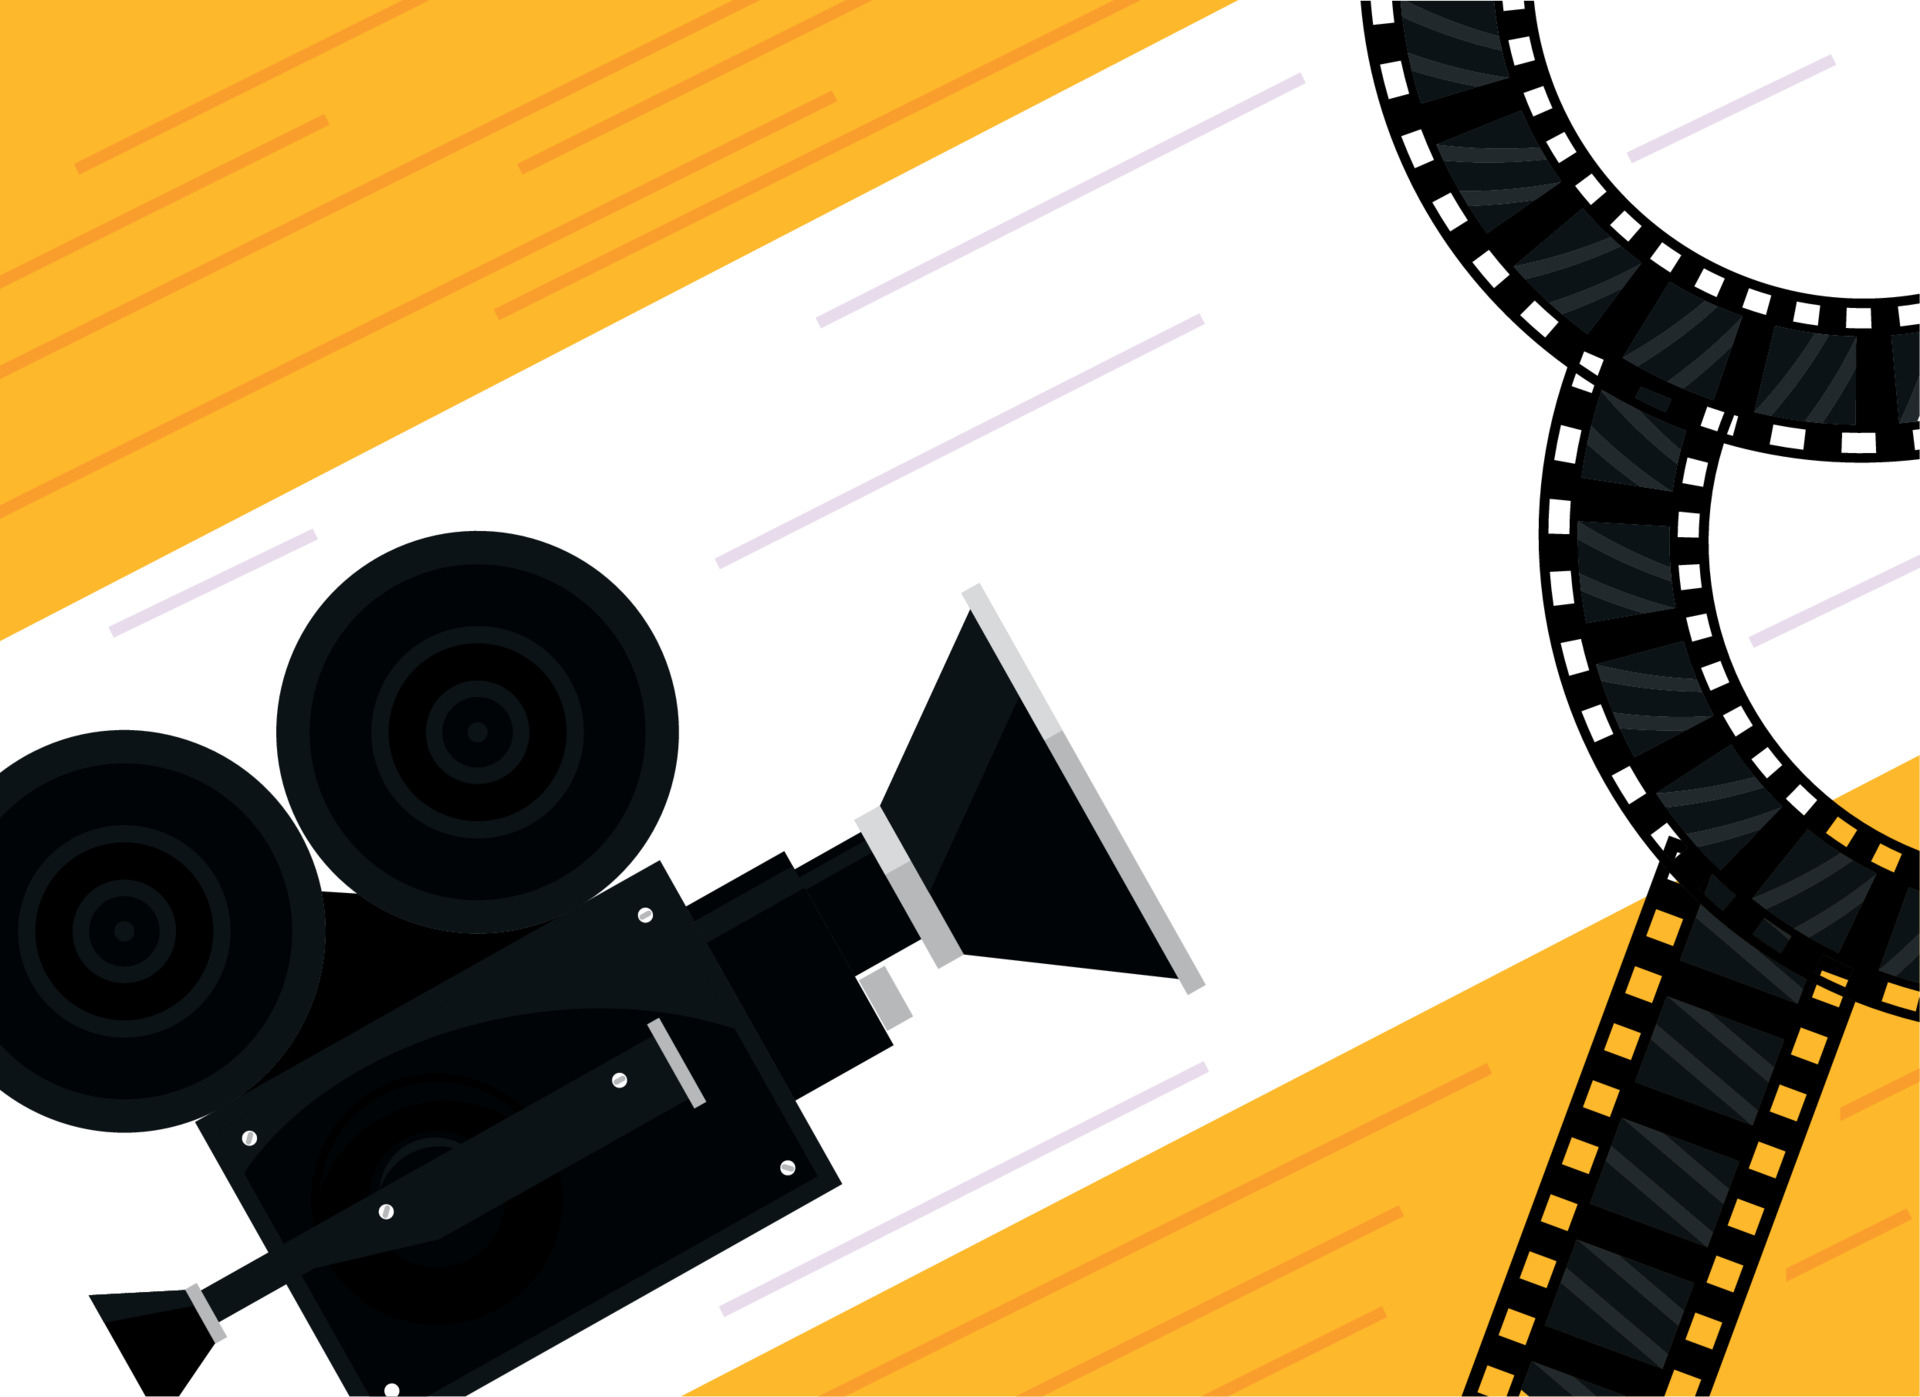
</div>
<div style="text-align: center;">

Analyzing several movie datasets can provide valuable insights that can lead to concrete business recommendations in various aspects of the film industry. When considering characteristics of a successful movie, I analyzed the movie data to identify movies with the greatest return on investment. Based on this analysis, which is explained below, I can recommend       . Furthermore, below are three recommendations based on my analysis:

1. 
2. 
3. 

It's important to note that any business recommendations derived from data analysis should be accompanied by careful consideration of the specific context, legal and regulatory requirements, and limitations of the dataset. Additionally, these recommendations should be subject to ongoing evaluation and refinement based on updated data and emerging industry practices.

# **Data Understanding**

The data has been collected from various locations. Different files have different formats. Some files are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database.

I have been provided a diagram for the IMDB data and will have to explore the other data to see how they connect to each other and the IMBD data.

<div>
<img src="attachment:IMBD%20data%20diagram.png" width="500"/>
</div>
<div style="text-align: center;">

# **Data Exploration**

In [1]:
# Import the necessary packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

#pd.options.display.float_format = '{:.2f}'.format

import sqlite3

conn = sqlite3.connect('Data/im.db')

import seaborn as sns
from glob import glob 

import cpi

%matplotlib inline

import functools 

pd.options.display.max_rows =999
pd.options.display.max_columns =999
np.set_printoptions(threshold=np.inf)#no trunkcated lists

There are a number of .csv and.tsv files provided in the zipped folder, I'll use glob to read them in by matching path names.

In [2]:
# Create a list of all csv files using glob
data_folder = './Data'
csv_files = glob(os.path.join(data_folder, '*.csv.gz'))
for i, file in enumerate(csv_files, 1):
    print(i, file, sep=': ')

1: ./Data/tmdb.movies.csv.gz
2: ./Data/tn.movie_budgets.csv.gz
3: ./Data/bom.movie_gross.csv.gz


Using the Name of the file as the key and and the Pandas Dataframe as the value, I'm creating a dictionary of DataFrames. I can preview all the data by iterrating over the dictionary this way.

In [3]:
# Create a dictionary of DataFrames
csv_dict = {}
for file in csv_files:
    filename = os.path.splitext(os.path.basename(file))[0].replace('.csv', '').replace('.', '_')  # Clean filename
    file_df = pd.read_csv(file)  # Create DataFrame
    csv_dict[filename] = file_df  # Insert DataFrame into dictionary

In [4]:
# Preview the data
for name, df in csv_dict.items():
    print(name)
    print('Total numer of results:', len(df))
    display(df.head()) # Using display instead of print leads to neater formatting in Jupyter Notebook

tmdb_movies
Total numer of results: 26517


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


tn_movie_budgets
Total numer of results: 5782


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


bom_movie_gross
Total numer of results: 3387


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Again, I'll use the same process for the .tsv files  

In [5]:
# Create a list of all tsv files using glob
data_folder = './Data'
tsv_files = glob(os.path.join(data_folder, '*.tsv.gz'))

In [6]:
# Create a dictionary of DataFrames
tsv_dict = {}
for file in tsv_files:
    filename = os.path.splitext(os.path.basename(file))[0].replace('.tsv', '').replace('.', '_')  # Clean filename
    file_df = pd.read_table(file, delimiter = '\t', encoding = 'latin-1') # Create DataFrame
    tsv_dict[filename] = file_df  # Insert DataFrame into dictionary

In [7]:
# Preview the data
for name, df in tsv_dict.items():
    print(name)
    print('Total numer of results:', len(df))
    display(df) # Using display instead of print leads to neater formatting in Jupyter Notebook

rt_reviews
Total numer of results: 54432


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


rt_movie_info
Total numer of results: 1560


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


There are a number of DataFrames. I'll focus my analysis on the data frames that, I think, best answer my questions. 

The first DataFrame which stands out is tn_movie_budgets. This table shows the production budget, domestic and worldwide gross. This financial information will be valuable in exploring the meaning of profit. It will also distinguish which films perfomed best in the box office.

Additional tables that I will explore include: bom_movie_gross (domestic and worldwide profit), rt_movie_info (film rating and studio locations), and tmdb_movies (genre). I'll also be incorporating data from SQL movie_akas(studio location) and movie_basics (genre).

# **Data Preparation**

## Data Cleaning

The request from the investors is to recommend an airplane for them to invest. So this reqires knowing a specific make and model. Addressing missing values in the 'Model' and 'Make' columns requires thoughtful consideration, as these columns are crucial for identifying aircrafts involved in accidents. 

In [8]:
#Clean up 'bom_movie_gross'
movie_gross = csv_dict['bom_movie_gross']
#get summary
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


movie_gross will require that we convert the money related data types to intergers.

In [9]:
# Define function to clean numbers
def numclean(df, col):
    '''
    param1 = Pandas DataFrame
    param2 = Column
    Converts to int type and excludes NaN values
    Returns DataFrame
    '''

    # Convert to numeric, handling NaN values
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='integer')
    
    # Drop rows with NaN values in the specified column
    df = df.dropna(subset=[col])

    return df


In [10]:
# Run function on the two columns
numclean(movie_gross,'foreign_gross')
numclean(movie_gross,'domestic_gross')

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [11]:
movie_gross.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


There aren't any entries here that seem unusual. It's worth noting that the movies in this data base range in year from 2010-2018

tn_movie_budgets will require that the $ symbol, the comma seperator be removed and the number converted to an integer so it makes sense to define a function and then apply it to the necessary columns to increase efficiency.

In [12]:
#Clean up 'tn_movie_gross'
ww_gross = csv_dict['tn_movie_budgets']
ww_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
# Convert release_date to a datetime object
ww_gross['release_date'] = pd.to_datetime(ww_gross['release_date'])

In [14]:
# Create year column 
ww_gross['year'] = pd.DatetimeIndex(ww_gross['release_date']).year

In [15]:
# Define function to clean numbers
def numclean2(df,col):
    '''
    param1 = Pandas DataFrame
    param2 = Column
    Removes $ symbol, removes ',' seperator and changes to int64 type
    Returns DataFrame
    '''
    if df[col].dtype != 'int64':
        df[col]=df[col].str.replace('$','').str.replace(',','').astype('int64')

    return df

In [16]:
numclean2(ww_gross,'worldwide_gross')
numclean2(ww_gross,'domestic_gross')
numclean2(ww_gross,'production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018
5778,79,1999-04-02,Following,6000,48482,240495,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015


In [17]:
ww_gross.describe()

,id,production_budget,domestic_gross,worldwide_gross,year
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000


This data table shows entries where the movie gross is zero, that's unusual and I'll dig into that. Additionally, the range of years represented in this data table span from 1915-2020.

In [18]:
#ww_gross[ww_gross['domestic_gross']==0]['domestic_gross'].value_counts()
len(ww_gross[(ww_gross['domestic_gross'] == 0) | (ww_gross['domestic_gross'].isnull())]) 

548

In [19]:
#ww_gross[ww_gross['worldwide_gross']==0]['worldwide_gross'].value_counts()
len(ww_gross[(ww_gross['worldwide_gross'] == 0) | (ww_gross['worldwide_gross'].isnull())]) 

367

In [20]:
#explore rows where the gross values are 0
#ww_gross[(ww_gross['domestic_gross']==0) & (ww_gross['worldwide_gross']==0)]
ww_gross[(ww_gross['domestic_gross']==0) | (ww_gross['worldwide_gross']==0)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
194,95,2020-12-31,Moonfall,150000000,0,0,2020
479,80,2017-12-13,Bright,90000000,0,0,2017
480,81,2019-12-31,Army of the Dead,90000000,0,0,2019
535,36,2020-02-21,Call of the Wild,82000000,0,0,2020
617,18,2012-12-31,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,2012
619,20,2019-01-22,Renegades,77500000,0,1521672,2019
670,71,2019-08-30,PLAYMOBIL,75000000,0,0,2019
671,72,2019-12-31,355,75000000,0,0,2019
820,21,2018-10-26,Air Strike,65000000,0,516279,2018
951,52,2015-12-11,The Ridiculous 6,60000000,0,0,2015


In [21]:
len(ww_gross[(ww_gross['domestic_gross']==0) | (ww_gross['worldwide_gross']==0)])

548

There are 181 instances where the domestic gross is zero and the worldwide gross has a value. Some movies may have staggered release dates, may not be released in the USA, or simply the data was never entered and so there may not be values avaiable for every entry.

Further investigation could continue, but I will join these two data sets and then proceed to drop any data that still contains a zero value for the gross revenue.

## Profit and Profit Margin

The value of this venture relies on making a profit on the investment. Due to multiple revenue streams, it's challenging to understand whether or not a box office movie is ultimately profitable - and to whom. There is an abundance of information that takes careful consideration, in context, to interpret meaningfully. 

There are a number of factors to consider such as:
1. opening weekend ranking
2. percentage drop between the first and second weekends
3. production budget:gross profit difference
4. movie advertising (promotional budget)
5. percentage studio revenue
6. percentage theater revenue
7. foreign vs domestic gross profit
8. DVD/video-on-demand releases

For both a precise and accurate analysis, a concrete understanding of which variables the company would be owning would be needed. Due to the lack of detailed financial data available publically around movie profitability, this project will share a simplified analysis model based on publically available data.

In this analysis*, we will be analyzing domestic profit; defined as follows:
profit = domestic gross revenue - production budget
profit margin is defined to be:

profit margin = (domestic gross revenue - production budget) / domestic gross revenue *100

  *all values in this analysis have been adjusted for inflation for accurate comparison.

### Aggragating money data

In [22]:
#Create variables for dictionaries 
rt_movie_info = tsv_dict['rt_movie_info']
tmdb_movies = csv_dict['tmdb_movies']

In [23]:
# Print columns for tmdb_movies data frame
print('Columns in tmdb_movies:')
print(tmdb_movies.columns)

# Print columns for tn_movie_budgets data frame
print('Columns in ww_gross:')
print(ww_gross.columns)

# Print columns for bom_movie_gross data frame
print('Columns in movie_gross:')
print(movie_gross.columns)

Columns in tmdb_movies:
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
Columns in ww_gross:
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year'],
      dtype='object')
Columns in movie_gross:
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [24]:
# Rename columns in ww_gross DataFrame
ww_gross = ww_gross.rename(columns={'movie': 'title'})

In [25]:
print(movie_gross.columns)
print(ww_gross.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'year'],
      dtype='object')


In [26]:
len(movie_gross[(movie_gross['domestic_gross'] == 0) | (movie_gross['domestic_gross'].isnull())]) 

28

In [27]:
len(movie_gross[(movie_gross['foreign_gross'] == 0) | (movie_gross['foreign_gross'].isnull())])

1355

In [28]:
len(movie_gross[(movie_gross['foreign_gross'] == 0) & (movie_gross['domestic_gross'] == 0)])

0

In [29]:
len(ww_gross[(ww_gross['production_budget'] == 0) | (ww_gross['production_budget'].isnull())])

0

Given the number of null or zero values between the movie_gross and ww_gross data sets, it turns out that the total number of usable data points reporting a worldwide gross is 7419 and the total number of usable data points reporting a domestic gross is 8593. It makes sense to maximize the data points reporting revenue in order to advise stakeholders on the best way to increase ROI. All subsequent calculations will be based on available domestic revenue figures. 

should I consider foreign? should I do a small analysis of data to show that domestic films in general can be used as a solid indicator for ROI?

In [30]:
#len(movie_gross[(movie_gross['worldwide_gross'] == 0) | (movie_gross['worldwide_gross'].isnull())]) 

In [31]:
#movie_gross['worldwide_gross']= movie_gross['domestic_gross'] + movie_gross['foreign_gross']
#movie_gross

In [32]:
movie_gross['title'] = movie_gross['title'].str.lower()
ww_gross['title'] = ww_gross['title'].str.lower()

In [33]:
# Join the DataFrames using an 'outer' join to include all rows from both DataFrames
money_df = pd.merge(movie_gross, ww_gross, on=['title', 'year'], how='outer')
money_df

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,toy story 3,BV,415000000.0,652000000.0,2010,47.0,2010-06-18,200000000.0,415004880.0,1.068880e+09
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010,NaN,NaT,NaN,NaN,NaN
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010,NaN,NaT,NaN,NaN,NaN
3,inception,WB,292600000.0,535700000.0,2010,38.0,2010-07-16,160000000.0,292576195.0,8.355246e+08
4,shrek forever after,P/DW,238700000.0,513900000.0,2010,27.0,2010-05-21,165000000.0,238736787.0,7.562447e+08
...,...,...,...,...,...,...,...,...,...,...
7909,red 11,NaN,NaN,NaN,2018,78.0,2018-12-31,7000.0,0.0,0.000000e+00
7910,following,NaN,NaN,NaN,1999,79.0,1999-04-02,6000.0,48482.0,2.404950e+05
7911,return to the land of wonders,NaN,NaN,NaN,2005,80.0,2005-07-13,5000.0,1338.0,1.338000e+03
7912,a plague so pleasant,NaN,NaN,NaN,2015,81.0,2015-09-29,1400.0,0.0,0.000000e+00


In [34]:
# Convert release_date to a datetime object
money_df['release_date'] = pd.to_datetime(money_df['release_date'])

In [35]:
#Create columns and average values from two different data sets

# Calculate the average for domestic gross
money_df['avg_domestic_gross'] = money_df[['domestic_gross_x', 'domestic_gross_y']].replace(0, np.nan).mean(axis=1)

# Calculate the average for worldwide gross
#money_df['avg_worldwide_gross'] = money_df[['worldwide_gross_x', 'worldwide_gross_y']].replace(0, np.nan).mean(axis=1)

# Drop unnecessary columns
money_df.drop(['domestic_gross_x', 'domestic_gross_y', 'studio', 'id'], axis=1, inplace=True)

# Drop rows with NaN in 'avg_domestic_gross'
money_df.dropna(subset=['avg_domestic_gross'], inplace=True)

money_df

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross
0,toy story 3,652000000.0,2010,2010-06-18,200000000.0,1.068880e+09,415002440.0
1,alice in wonderland (2010),691300000.0,2010,NaT,NaN,NaN,334200000.0
2,harry potter and the deathly hallows part 1,664300000.0,2010,NaT,NaN,NaN,296000000.0
3,inception,535700000.0,2010,2010-07-16,160000000.0,8.355246e+08,292588097.5
4,shrek forever after,513900000.0,2010,2010-05-21,165000000.0,7.562447e+08,238718393.5
...,...,...,...,...,...,...,...
7907,cavite,NaN,2006,2006-05-26,7000.0,7.164400e+04,70071.0
7908,the mongol king,NaN,2004,2004-12-31,7000.0,9.000000e+02,900.0
7910,following,NaN,1999,1999-04-02,6000.0,2.404950e+05,48482.0
7911,return to the land of wonders,NaN,2005,2005-07-13,5000.0,1.338000e+03,1338.0


In [36]:
money_df[money_df.duplicated(['title'], keep=False)].sort_values(by=['title'])

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross
7752,"20,000 leagues under the sea",NaN,1916,1916-12-24,200000.0,8.000000e+06,8000000.0
6574,"20,000 leagues under the sea",NaN,1954,1954-12-23,5000000.0,2.820000e+07,28200000.0
4315,a monster calls,NaN,2017,2017-01-06,43000000.0,4.641453e+07,3740823.0
2435,a monster calls,43600000.0,2016,NaT,NaN,NaN,3700000.0
4531,a nightmare on elm street,NaN,2010,2010-04-30,35000000.0,1.177296e+08,63075011.0
7201,a nightmare on elm street,NaN,1984,1984-11-09,1800000.0,2.550451e+07,25504513.0
4810,aladdin,NaN,1992,1992-11-11,28000000.0,5.040502e+08,217350219.0
3418,aladdin,NaN,2019,2019-05-24,182000000.0,6.192343e+08,246734314.0
6321,albert nobbs,NaN,2011,2011-12-21,7500000.0,8.539003e+06,3014696.0
924,albert nobbs,2600000.0,2012,NaT,NaN,NaN,3000000.0


In [37]:
# Sort the DataFrame by 'title' and 'release_date'
money_df.sort_values(by=['title', 'release_date'], inplace=True)

# Find duplicates within one year of each other for each title
mask = money_df.duplicated(subset=['title'], keep=False)
duplicates = money_df[mask]

# Create a mask to identify duplicates with a difference of 1 in years
mask_within_one_year = (duplicates['year'].diff().abs() == 1)

# Filter out duplicates where the difference between years is 1
duplicates_within_one_year = duplicates[mask_within_one_year]

# Keep the rows with the 'release_date' and drop the other duplicates
to_drop = duplicates_within_one_year[duplicates_within_one_year['release_date'].isnull()].index
money_df.drop(to_drop, inplace=True)

money_df

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross
2093,'71,355000.0,2015,NaT,NaN,NaN,1300000.0
6309,(500) days of summer,NaN,2009,2009-07-17,7500000.0,3.443906e+07,32425665.0
1830,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0
2395,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,1.082864e+08,72091499.5
5913,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,1.461600e+04,14616.0
...,...,...,...,...,...,...,...
2426,zoolander 2,27900000.0,2016,2016-02-12,50000000.0,5.534869e+07,28824346.5
4584,zoom,NaN,2006,2006-08-11,35000000.0,1.250619e+07,11989328.0
2325,zootopia,682500000.0,2016,2016-03-04,150000000.0,1.019430e+09,341284124.0
5135,zwartboek,NaN,2007,2007-04-06,22000000.0,2.723835e+07,4398532.0


In [38]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7333 entries, 2093 to 5331
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               7333 non-null   object        
 1   foreign_gross       1994 non-null   float64       
 2   year                7333 non-null   int64         
 3   release_date        5238 non-null   datetime64[ns]
 4   production_budget   5238 non-null   float64       
 5   worldwide_gross     5238 non-null   float64       
 6   avg_domestic_gross  7333 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 458.3+ KB


In [39]:
# Adjust $ columns for inflation using CPI
columns_to_adjust = ['worldwide_gross', 'avg_domestic_gross', 'foreign_gross', 'production_budget']

#money_df = money_df.astype({'avg_domestic_gross': 'int64', 'foreign_gross': 'int64'})

for column in columns_to_adjust:
    print (column)
    money_df[f'cpi_{column}'] = money_df.apply(lambda row: cpi.inflate(row[column], row['year']), axis=1)

money_df

worldwide_gross
avg_domestic_gross
foreign_gross
production_budget


,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget
2093,'71,355000.0,2015,NaT,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN
6309,(500) days of summer,NaN,2009,2009-07-17,7500000.0,3.443906e+07,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07
1830,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN
2395,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,1.082864e+08,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06
5913,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,1.461600e+04,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07
...,...,...,...,...,...,...,...,...,...,...,...
2426,zoolander 2,27900000.0,2016,2016-02-12,50000000.0,5.534869e+07,28824346.5,6.749000e+07,3.514726e+07,3.402015e+07,6.096801e+07
4584,zoom,NaN,2006,2006-08-11,35000000.0,1.250619e+07,11989328.0,1.815475e+07,1.740445e+07,NaN,5.080816e+07
2325,zootopia,682500000.0,2016,2016-03-04,150000000.0,1.019430e+09,341284124.0,1.243052e+09,4.161483e+08,8.322134e+08,1.829040e+08
5135,zwartboek,NaN,2007,2007-04-06,22000000.0,2.723835e+07,4398532.0,3.844586e+07,6.208353e+06,NaN,3.105213e+07


In [40]:
# Use plain formatting to remove scientific notation
money_df['cpi_worldwide_gross'] = pd.to_numeric(money_df['cpi_worldwide_gross'], errors='coerce')
money_df['cpi_production_budget'] = pd.to_numeric(money_df['cpi_production_budget'], errors='coerce')
money_df['cpi_foreign_gross'] = pd.to_numeric(money_df['cpi_foreign_gross'], errors='coerce')
money_df['cpi_avg_domestic_gross'] = pd.to_numeric(money_df['cpi_avg_domestic_gross'], errors='coerce')

# Create domestic_profit column
money_df['domestic_profit'] = money_df.apply(lambda x: (x['cpi_avg_domestic_gross']) - (x['cpi_production_budget']), axis = 1)

# Get summary statistics for profit
money_df['domestic_profit'].describe().apply(lambda x: format(x, 'f'))

count          5238.000000
mean       29936694.494074
std       138935555.292897
min      -351700264.263251
25%       -13793419.029572
50%          381850.456442
75%        37664699.763025
max      4100969672.507194
Name: domestic_profit, dtype: object

Profit and loss amounts vary greatly ranging from approximately (in US Dollars) 350 million in losses to 4 billion in profits. The median indicates a movie profit of approximately 380 thousand.

In [41]:
# Calculate the domestic profit margin for each movie and make a new column
money_df['domestic_profit_margin'] = (money_df['domestic_profit'] / money_df['cpi_avg_domestic_gross']) * 100

money_df

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin
2093,'71,355000.0,2015,NaT,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN,NaN,NaN
6309,(500) days of summer,NaN,2009,2009-07-17,7500000.0,3.443906e+07,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07,3.400169e+07,76.870174
1830,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN,NaN,NaN
2395,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,1.082864e+08,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06,8.180871e+07,93.064370
5913,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,1.461600e+04,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07,-1.479886e+07,-82001.806240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,zoolander 2,27900000.0,2016,2016-02-12,50000000.0,5.534869e+07,28824346.5,6.749000e+07,3.514726e+07,3.402015e+07,6.096801e+07,-2.582075e+07,-73.464470
4584,zoom,NaN,2006,2006-08-11,35000000.0,1.250619e+07,11989328.0,1.815475e+07,1.740445e+07,NaN,5.080816e+07,-3.340371e+07,-191.926286
2325,zootopia,682500000.0,2016,2016-03-04,150000000.0,1.019430e+09,341284124.0,1.243052e+09,4.161483e+08,8.322134e+08,1.829040e+08,2.332443e+08,56.048351
5135,zwartboek,NaN,2007,2007-04-06,22000000.0,2.723835e+07,4398532.0,3.844586e+07,6.208353e+06,NaN,3.105213e+07,-2.484377e+07,-400.166874


Some of the % don't add to 100% so the difference may be attributed to documenting movie gross profits at different times during the movie's run time. If the value is negative, it may mean a profit loss.

Let's visualize how many movies were profitable (domestic_profit/=profit margine as defined above)

In [42]:
#'sand' - #E2CA76
#'light gold' - #FDDC5C
#'maize' - #F4D054
#'goldenrod' - #F9A602
#'macaroni and cheese' - #EFB435
#'gold' - #DBB40C
#'dark gold' - #A58F0D
#'ochre' - #BF9B0C
#'black' - #000000

# Define film company custom color palette using XKCD color names
film_company_palette = sns.xkcd_palette(['sand', 'light gold', 'maize', 'goldenrod', 'macaroni and cheese', 'gold', 'dark gold', 'ochre', 'black'])

# Set the custom palette
sns.set_palette(film_company_palette)
film_company_palette

[(0.8862745098039215, 0.792156862745098, 0.4627450980392157),
 (0.9921568627450981, 0.8627450980392157, 0.3607843137254902),
 (0.9568627450980393, 0.8156862745098039, 0.32941176470588235),
 (0.9803921568627451, 0.7607843137254902, 0.0196078431372549),
 (0.9372549019607843, 0.7058823529411765, 0.20784313725490197),
 (0.8588235294117647, 0.7058823529411765, 0.047058823529411764),
 (0.7098039215686275, 0.5803921568627451, 0.06274509803921569),
 (0.7490196078431373, 0.5647058823529412, 0.0196078431372549),
 (0.0, 0.0, 0.0)]

In [43]:
# Print information about money_df
print('money_df Movie Info:')
print('Total number of results:', len(money_df))
money_df

money_df Movie Info:
Total number of results: 7333


,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin
2093,'71,355000.0,2015,NaT,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN,NaN,NaN
6309,(500) days of summer,NaN,2009,2009-07-17,7500000.0,3.443906e+07,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07,3.400169e+07,76.870174
1830,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN,NaN,NaN
2395,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,1.082864e+08,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06,8.180871e+07,93.064370
5913,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,1.461600e+04,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07,-1.479886e+07,-82001.806240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,zoolander 2,27900000.0,2016,2016-02-12,50000000.0,5.534869e+07,28824346.5,6.749000e+07,3.514726e+07,3.402015e+07,6.096801e+07,-2.582075e+07,-73.464470
4584,zoom,NaN,2006,2006-08-11,35000000.0,1.250619e+07,11989328.0,1.815475e+07,1.740445e+07,NaN,5.080816e+07,-3.340371e+07,-191.926286
2325,zootopia,682500000.0,2016,2016-03-04,150000000.0,1.019430e+09,341284124.0,1.243052e+09,4.161483e+08,8.322134e+08,1.829040e+08,2.332443e+08,56.048351
5135,zwartboek,NaN,2007,2007-04-06,22000000.0,2.723835e+07,4398532.0,3.844586e+07,6.208353e+06,NaN,3.105213e+07,-2.484377e+07,-400.166874


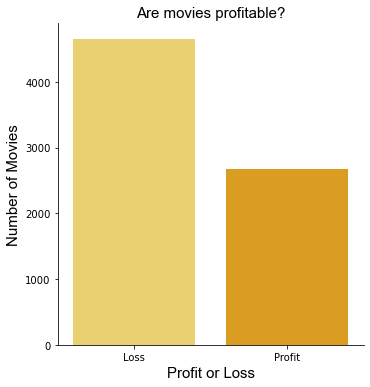

In [44]:
# ww_profit column has both positive and negative values
money_df['Profit or Loss'] = money_df['domestic_profit'].apply(lambda x: 'Profit' if x >= 0 else 'Loss')

#def profit_loss(x):
# if x:
#  if x >= 0:
#   return “Profit”
#  else: 
#   return “Loss”
# else:
#  return x
#merged_df2['Profit or Loss'] = merged_df2['ww_profit'].apply(profit_loss)
# Plot count of positive vs negative profit margins
sns.catplot(x='Profit or Loss', kind='count', palette=['#FDDC5C','#F9A602'], data=money_df)
plt.xlabel('Profit or Loss', fontfamily = 'Arial', fontsize = 15)
plt.ylabel('Number of Movies', fontfamily = 'Arial', fontsize = 15)
plt.title('Are movies profitable?', fontfamily = 'Arial', fontsize = 15)
plt.show()

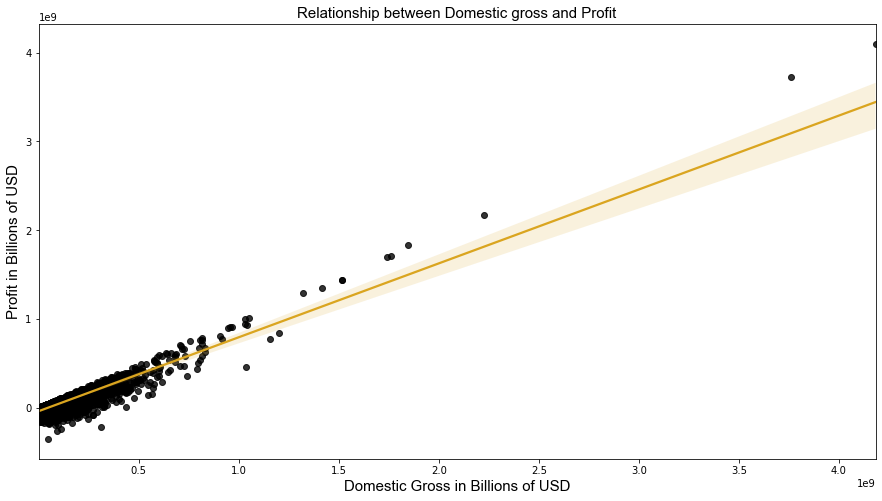

In [45]:
# Plot relationship between profit and worldwide gross
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the Q-Q plot with specified colors
# 'results.resid' contains the residuals from the model
# 'dist=norm' specifies the normal distribution
# 'line="45"' draws the 45-degree reference line
# 'fit=True' fits a line to the quantiles
# 'ax=ax' specifies the axis for plotting
#sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)

# Customize the appearance of the data points (color to gold - '#DAA520')
#ax.get_lines()[0].set_markeredgecolor('#DAA520')
#ax.get_lines()[0].set_markerfacecolor('#DAA520')

# Customize the appearance of the reference line (in black)
#ax.get_lines()[1].set_color('black')

sns.regplot(
    x='cpi_avg_domestic_gross',
    y='domestic_profit',
    data= money_df,
    scatter_kws={"color": 'black'},
    line_kws={"color": '#DAA520'},
    ci=95,  # Adjust the confidence interval
)

plt.title('Relationship between Domestic gross and Profit', fontfamily = 'Arial', fontsize = 15)
plt.xlabel('Domestic Gross in Billions of USD', fontfamily = 'Arial', fontsize = 15)
plt.ylabel('Profit in Billions of USD', fontfamily = 'Arial', fontsize = 15)

plt.show()

This plot shows a strong, positive, linear association between profit and domestic gross with a few outliers. 

This means that I can assume (based on how profit has been previously defined), that top grossing films are also the most profitable.  

Next is an exploration into profit a little further to understand the difference between profit and profit margin and realize which one serves as a better measurement for understanding the costs associated with making movies. Since it's been shown that top grossing movies are the most profitable, the top 100 grossing movies will be considered in this analysis.

In [46]:
# Set top_grossing as top 100 movies
top_grossing = money_df.sort_values('cpi_avg_domestic_gross', ascending = False)[:100]

In [47]:
# Describe profit
# Use plain format to remove scientific notation - improves readability
top_grossing['domestic_profit'].describe().apply(lambda x: format(x, 'f'))

count            95.000000
mean      688124987.467379
std       603250927.596687
min       143458333.333333
25%       400917965.332795
50%       525636019.034479
75%       758973492.785154
max      4100969672.507194
Name: domestic_profit, dtype: object

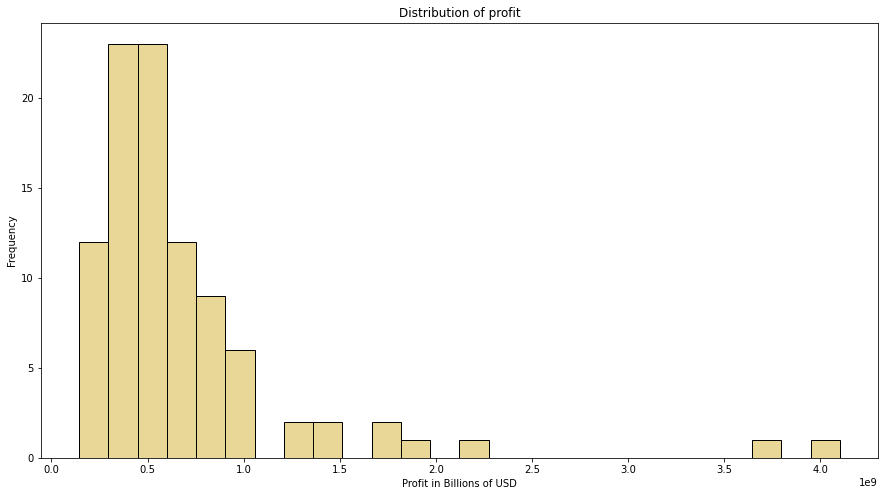

In [48]:
# Plot distribution of profit using histplot
plt.figure(figsize = (15,8))
sns.histplot(top_grossing['domestic_profit'])
plt.title('Distribution of profit')
plt.xlabel('Profit in Billions of USD')
plt.ylabel('Frequency')
plt.show()

This graph shows that the median profit is approximately 500 million US dollars.

In [49]:
# Create profit margin column
#merged_df2['profit_margin'] = merged_df2.apply(lambda x: ((x['ww_profit']) / (x['cpi_worldwide_gross']))*100, axis = 1)

# Get summary statistics for profit margin
# Use plain formatting to remove scientific notation
money_df['domestic_profit_margin'].describe().apply(lambda x: format(x, 'f'))

count        5238.000000
mean        -4459.698385
std         70484.653187
min      -3267873.856209
25%          -156.738678
50%             2.931248
75%            55.418350
max            99.944444
Name: domestic_profit_margin, dtype: object

There is a significant outlier with a large negative value. Additionally, a considerable portion of these movies have a negative profit margin, indicating a loss. So again, the analysis will only consider the top 100 grossing movies.

In [50]:
# Set top_grossing as top 100 movies
#top_grossing = merged_df2.sort_values('cpi_worldwide_gross', ascending = False)[:100]
# Describe profit
top_grossing['domestic_profit_margin'].describe().apply(lambda x: format(x, 'f'))

count    95.000000
mean     78.025317
std      18.441036
min      26.315789
25%      65.397128
50%      84.079182
75%      94.716262
max      99.324348
Name: domestic_profit_margin, dtype: object

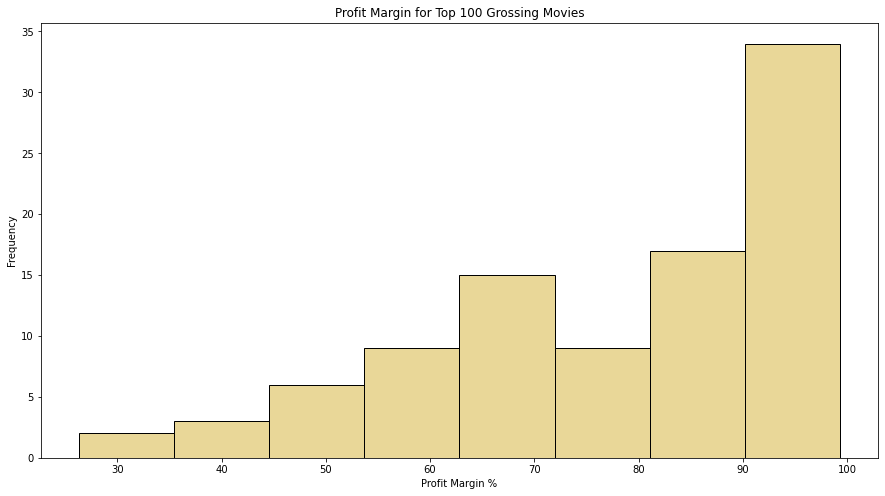

In [51]:
# Plot distribution of profit margin for top_grossing using distplot
plt.figure(figsize = (15,8))
sns.histplot(top_grossing['domestic_profit_margin'])
plt.title('Profit Margin for Top 100 Grossing Movies')
plt.xlabel('Profit Margin %')
plt.ylabel('Frequency')
plt.show()

The median profit margin for a top 100 all-time grossing movie is approximately 85%

In [52]:
# Get top profit movies 
top_profit = top_grossing.sort_values('domestic_profit', ascending = False)
top_profit

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss
6814,gone with the wind,NaN,1939,1939-12-15,3900000.0,3.905252e+08,198680470.0,8.222241e+09,4.183082e+09,NaN,8.211183e+07,4.100970e+09,98.037049,Profit
7293,snow white and the seven dwarfs,NaN,1937,1937-12-21,1488000.0,1.849255e+08,184925486.0,3.758289e+09,3.758289e+09,NaN,3.024102e+07,3.728048e+09,99.195352,Profit
5928,star wars ep. iv: a new hope,NaN,1977,1977-05-25,11000000.0,7.865980e+08,460998007.0,3.798710e+09,2.226293e+09,NaN,5.312219e+07,2.173171e+09,97.613873,Profit
7497,bambi,NaN,1942,1942-08-13,858000.0,2.680000e+08,102797000.0,4.811751e+09,1.845648e+09,NaN,1.540478e+07,1.830243e+09,99.165345,Profit
7073,pinocchio,NaN,1940,1940-02-09,2289247.0,8.430000e+07,84300000.0,1.762201e+09,1.762201e+09,NaN,4.785426e+07,1.714347e+09,97.284405,Profit
7074,fantasia,NaN,1940,1940-11-13,2280000.0,8.332000e+07,83320000.0,1.741715e+09,1.741715e+09,NaN,4.766096e+07,1.694054e+09,97.263562,Profit
6232,the sound of music,NaN,1965,1965-03-02,8200000.0,2.862143e+08,163214286.0,2.659112e+09,1.516364e+09,NaN,7.618321e+07,1.440181e+09,94.975930,Profit
5832,the exorcist,NaN,1973,1973-12-26,12000000.0,4.282145e+08,230347346.0,2.822502e+09,1.518295e+09,NaN,7.909595e+07,1.439199e+09,94.790476,Profit
5831,jaws,NaN,1975,1975-06-20,12000000.0,4.707000e+08,260000000.0,2.560459e+09,1.414318e+09,NaN,6.527621e+07,1.349042e+09,95.384615,Profit
5980,et: the extra-terrestrial,NaN,1982,1982-06-11,10500000.0,7.929653e+08,435110554.0,2.404821e+09,1.319557e+09,NaN,3.184329e+07,1.287714e+09,97.586820,Profit


In [53]:
# Get top profit margin movies 
top_margin = top_grossing.sort_values('domestic_profit_margin', ascending = False)
top_margin

,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss
7521,american graffiti,NaN,1973,1973-08-11,777000.0,1.400000e+08,115000000.0,9.227860e+08,7.580028e+08,NaN,5.121462e+06,7.528814e+08,99.324348,Profit
7293,snow white and the seven dwarfs,NaN,1937,1937-12-21,1488000.0,1.849255e+08,184925486.0,3.758289e+09,3.758289e+09,NaN,3.024102e+07,3.728048e+09,99.195352,Profit
7507,billy jack,NaN,1971,1971-01-01,800000.0,9.800000e+07,98000000.0,7.081528e+08,7.081528e+08,NaN,5.780840e+06,7.023720e+08,99.183673,Profit
7497,bambi,NaN,1942,1942-08-13,858000.0,2.680000e+08,102797000.0,4.811751e+09,1.845648e+09,NaN,1.540478e+07,1.830243e+09,99.165345,Profit
7384,rocky,NaN,1976,1976-11-21,1000000.0,2.250000e+08,117235147.0,1.157247e+09,6.029781e+08,NaN,5.143322e+06,5.978347e+08,99.147013,Profit
6814,gone with the wind,NaN,1939,1939-12-15,3900000.0,3.905252e+08,198680470.0,8.222241e+09,4.183082e+09,NaN,8.211183e+07,4.100970e+09,98.037049,Profit
6899,national lampoon's animal house,NaN,1978,1978-07-28,3000000.0,1.416000e+08,141600000.0,6.355820e+08,6.355820e+08,NaN,1.346572e+07,6.221163e+08,97.881356,Profit
7014,blazing saddles,NaN,1974,1974-02-07,2600000.0,1.195000e+08,119500000.0,7.093767e+08,7.093767e+08,NaN,1.543414e+07,6.939426e+08,97.824268,Profit
5928,star wars ep. iv: a new hope,NaN,1977,1977-05-25,11000000.0,7.865980e+08,460998007.0,3.798710e+09,2.226293e+09,NaN,5.312219e+07,2.173171e+09,97.613873,Profit
5980,et: the extra-terrestrial,NaN,1982,1982-06-11,10500000.0,7.929653e+08,435110554.0,2.404821e+09,1.319557e+09,NaN,3.184329e+07,1.287714e+09,97.586820,Profit


This is interesting, note that the movies with the all-time highest profit differ from those with the highest all-time profit margin. 

### Aggragating more release date and title names

In [54]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [55]:
# Change the movie titles to lowercase
tmdb_movies['original_title'] = tmdb_movies['original_title'].str.lower()
tmdb_movies['title'] = tmdb_movies['title'].str.lower()

# Create year column 
tmdb_movies['year'] = pd.DatetimeIndex(tmdb_movies['release_date']).year

tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
0,0,"[12, 14, 10751]",12444,en,harry potter and the deathly hallows: part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788,2010
1,1,"[14, 12, 16, 10751]",10191,en,how to train your dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,2010
2,2,"[12, 28, 878]",10138,en,iron man 2,28.515,2010-05-07,iron man 2,6.8,12368,2010
3,3,"[16, 35, 10751]",862,en,toy story,28.005,1995-11-22,toy story,7.9,10174,1995
4,4,"[28, 878, 12]",27205,en,inception,27.920,2010-07-16,inception,8.3,22186,2010
...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,laboratory conditions,0.600,2018-10-13,laboratory conditions,0.0,1,2018
26513,26513,"[18, 53]",485975,en,_exhibit_84xxx_,0.600,2018-05-01,_exhibit_84xxx_,0.0,1,2018
26514,26514,"[14, 28, 12]",381231,en,the last one,0.600,2018-10-01,the last one,0.0,1,2018
26515,26515,"[10751, 12, 28]",366854,en,trailer made,0.600,2018-06-22,trailer made,0.0,1,2018


In [56]:
many_titles_df = pd.merge(money_df, tmdb_movies, on=['title', 'year'], how='outer')
many_titles_df

,title,foreign_gross,year,release_date_x,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,'71,355000.0,2015,NaT,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN,NaN,NaN,Loss,14303.0,"[53, 28, 18, 10752]",252178.0,en,'71,10.523,2015-02-27,6.8,627.0
1,(500) days of summer,NaN,2009,2009-07-17,7500000.0,34439060.0,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07,3.400169e+07,76.870174,Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,000 times good night",NaN,2014,NaT,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN,NaN,NaN,Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10 cloverfield lane,38100000.0,2016,2016-03-11,5000000.0,108286422.0,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06,8.180871e+07,93.064370,Profit,17422.0,"[53, 878, 18]",333371.0,en,10 cloverfield lane,17.892,2016-03-11,6.9,4629.0
4,10 days in a madhouse,NaN,2015,2015-11-11,12000000.0,14616.0,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07,-1.479886e+07,-82001.806240,Loss,15907.0,[18],345003.0,en,10 days in a madhouse,0.955,2015-11-20,5.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31368,laboratory conditions,NaN,2018,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26512.0,"[27, 18]",488143.0,en,laboratory conditions,0.600,2018-10-13,0.0,1.0
31369,_exhibit_84xxx_,NaN,2018,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26513.0,"[18, 53]",485975.0,en,_exhibit_84xxx_,0.600,2018-05-01,0.0,1.0
31370,the last one,NaN,2018,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26514.0,"[14, 28, 12]",381231.0,en,the last one,0.600,2018-10-01,0.0,1.0
31371,trailer made,NaN,2018,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26515.0,"[10751, 12, 28]",366854.0,en,trailer made,0.600,2018-06-22,0.0,1.0


In [57]:
# Fill NaN or 0.0 cells in column release_date_y with value from release_date_x
many_titles_df['release_date_y'].fillna(many_titles_df['release_date_x'], inplace=True)

# Drop the 'release_date_x' column
many_titles_df.drop(columns=['release_date_x'], inplace=True)

# Rename 'release_date_y' to 'release_date'
many_titles_df.rename(columns={'release_date_y': 'release_date'}, inplace=True)

# Drop the 'id_x and _y columns' columns
many_titles_df.drop(columns=['id', 'Unnamed: 0'], inplace=True)

many_titles_df.drop_duplicates()

many_titles_df

,title,foreign_gross,year,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,original_title,popularity,release_date,vote_average,vote_count
0,'71,355000.0,2015,NaN,NaN,1300000.0,NaN,1.605165e+06,4.383336e+05,NaN,NaN,NaN,Loss,"[53, 28, 18, 10752]",en,'71,10.523,2015-02-27,6.8,627.0
1,(500) days of summer,NaN,2009,7500000.0,34439060.0,32425665.0,4.697914e+07,4.423262e+07,NaN,1.023093e+07,3.400169e+07,76.870174,Profit,NaN,NaN,NaN,NaN,2009-07-17 00:00:00,NaN,NaN
2,"1,000 times good night",NaN,2014,NaN,NaN,53900.0,NaN,6.663163e+04,NaN,NaN,NaN,NaN,Loss,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,10 cloverfield lane,38100000.0,2016,5000000.0,108286422.0,72091499.5,1.320402e+08,8.790551e+07,4.645763e+07,6.096801e+06,8.180871e+07,93.064370,Profit,"[53, 878, 18]",en,10 cloverfield lane,17.892,2016-03-11,6.9,4629.0
4,10 days in a madhouse,NaN,2015,12000000.0,14616.0,14616.0,1.804700e+04,1.804700e+04,NaN,1.481691e+07,-1.479886e+07,-82001.806240,Loss,[18],en,10 days in a madhouse,0.955,2015-11-20,5.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31368,laboratory conditions,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[27, 18]",en,laboratory conditions,0.600,2018-10-13,0.0,1.0
31369,_exhibit_84xxx_,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[18, 53]",en,_exhibit_84xxx_,0.600,2018-05-01,0.0,1.0
31370,the last one,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14, 28, 12]",en,the last one,0.600,2018-10-01,0.0,1.0
31371,trailer made,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[10751, 12, 28]",en,trailer made,0.600,2018-06-22,0.0,1.0


In [58]:
# Replace NaN values in 'original_title' with values from 'title'
many_titles_df['original_title'].fillna(many_titles_df['title'], inplace=True)

# Replace NaN values in 'title' with values from 'original_title'
many_titles_df['title'].fillna(many_titles_df['original_title'], inplace=True)


In [59]:
# Find and count duplicates between the two columns
duplicate_count = many_titles_df[many_titles_df.duplicated(subset=['original_title', 'title'], keep=False)].shape[0]

print(f"Number of duplicate titles between 'original_title' and 'title': {duplicate_count}")


Number of duplicate titles between 'original_title' and 'title': 3924


In [60]:
# Create a boolean mask to identify rows where values in the two columns differ
mask = many_titles_df['original_title'] != many_titles_df['title']

# Extract rows with differences in the specified columns
differing_rows = many_titles_df[mask][['original_title', 'title']]

# Print the differing rows
print("Rows with differences in 'original_title' and 'title':")
print(differing_rows)

# Print the length of the list
f"Number of differing rows: {len(differing_rows)}"

Rows with differences in 'original_title' and 'title':
                     original_title                            title
18                           十三人の刺客                     13 assassins
21                            elser                       13 minutes
29                             辛亥革命                             1911
36                       टू स्टेट्स                         2 states
103                         7 cajas                          7 boxes
...                             ...                              ...
31277        czarne lusterko: 69.90       little black mirror: 69.90
31292  el verano del león eléctrico  the summer of the electric lion
31301             contes de juillet                       july tales
31353              la última virgen                  the last virgin
31365                     dreamaway                       dream away

[2532 rows x 2 columns]


'Number of differing rows: 2532'

In [61]:
# Drop the 'original_title' column
many_titles_df.drop(columns=['original_title'], inplace=True)

### Extract and aggragate SQLite Tables to Pandas dataframe

In [62]:
table_names = ['movie_basics', 'writers', 'directors', 'persons']

# Create an empty dictionary to store DataFrames
SQL_dataframes = {}

# Loop through table names and read data into DataFrames
for table in table_names:
    sql_query = f'SELECT * FROM {table}'
    SQL_dataframes[table] = pd.read_sql(sql_query, conn)


In [63]:
# Preview the data from SQL DataFrames
for name, df in SQL_dataframes.items():
    print(name)
    print('Total number of results:', len(df))
    display(df)  # Using display instead of print leads to neater formatting in Jupyter Notebook
    print(df.info())
    print('------------------ \n')


movie_basics
Total number of results: 146144


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
------------------ 

writers
Total number of results: 255873


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB
None
------------------ 

directors
Total number of results: 291174


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB
None
------------------ 

persons
Total number of results: 606648


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None
------------------ 



In [64]:
# Access the 'movie_basics' DataFrame from the SQL_dataframes dictionary
movie_basics_df = SQL_dataframes['movie_basics']

# Create a copy of the DataFrame to avoid altering the original
movie_basics_ga = movie_basics_df.copy()

# Merge the DataFrames on 'primary_title' and 'start_year' in 'movie_basics_ga' with 'title' and 'year' in 'many_titles_df'
main_df = pd.merge(
    movie_basics_ga, 
    many_titles_df, 
    left_on=['primary_title', 'start_year'], 
    right_on=['title', 'year'], 
    how='outer'
).drop_duplicates()



print('Total number of results:', len(main_df))
main_df

Total number of results: 176449


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,foreign_gross,year,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
0,tt0063540,Sunghursh,Sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018.0,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017.0,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177464,NaN,NaN,NaN,NaN,NaN,NaN,laboratory conditions,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[27, 18]",en,0.6,2018-10-13,0.0,1.0
177465,NaN,NaN,NaN,NaN,NaN,NaN,_exhibit_84xxx_,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[18, 53]",en,0.6,2018-05-01,0.0,1.0
177466,NaN,NaN,NaN,NaN,NaN,NaN,the last one,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14, 28, 12]",en,0.6,2018-10-01,0.0,1.0
177467,NaN,NaN,NaN,NaN,NaN,NaN,trailer made,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[10751, 12, 28]",en,0.6,2018-06-22,0.0,1.0


In [65]:
# Convert strings to lowercase in 'primary_title_y' and 'title' columns
main_df['primary_title'] = main_df['primary_title'].str.lower()

# Convert strings to lowercase in 'original_title' and 'title' columns
main_df['original_title'] = main_df['original_title'].str.lower()

# Find and count duplicates between the two columns
duplicate_count = main_df[main_df.duplicated(subset=['primary_title', 'title'], keep=False)].shape[0]

print(f"Number of duplicate titles between 'primary_title' and 'title': {duplicate_count}")

Number of duplicate titles between 'primary_title' and 'title': 19165


In [66]:
# Fill NaN or 0.0 cells in column primary_title with value from title
main_df['primary_title'].fillna(main_df['title'], inplace=True)

# Fill NaN or 0.0 cells in column primary_title with value from original_title
main_df['primary_title'].fillna(main_df['original_title'], inplace=True)

# Fill NaN or 0.0 cells in column start_year with value from year
main_df['start_year'].fillna(main_df['year'], inplace=True)

# Drop the 'year' column
main_df.drop(columns=['year'], inplace=True)

# Rename 'start_year' to 'years'
main_df.rename(columns={'start_year': 'release_year'}, inplace=True)

# Drop the 'title' column
main_df.drop(columns=['title','original_title'], inplace=True)

# Rename 'primary_title' to 'title'
main_df.rename(columns={'primary_title': 'title'}, inplace=True)

main_df

,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
0,tt0063540,sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0066787,one day before the rainy season,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0069049,the other side of the wind,2018.0,122.0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0069204,sabse bada sukh,2018.0,NaN,"Comedy,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0100275,the wandering soap opera,2017.0,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177464,NaN,laboratory conditions,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[27, 18]",en,0.6,2018-10-13,0.0,1.0
177465,NaN,_exhibit_84xxx_,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[18, 53]",en,0.6,2018-05-01,0.0,1.0
177466,NaN,the last one,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14, 28, 12]",en,0.6,2018-10-01,0.0,1.0
177467,NaN,trailer made,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[10751, 12, 28]",en,0.6,2018-06-22,0.0,1.0


In [67]:
# Check for duplicates in the 'title' column
title_duplicates = main_df.duplicated(subset=['title'], keep=False)

# Display a sample of rows with duplicate titles
sample_duplicates = main_df[title_duplicates].sort_values(by='title').head(10)
sample_duplicates


,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count
53283,tt3120962,#5,2013.0,68.0,"Biography,Comedy,Fantasy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132075,tt8219776,#5,2018.0,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128223,tt7853996,#allmymovies,2015.0,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168121,NaN,#allmymovies,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[99],en,0.840,2015-11-12,9.0,4.0
173604,NaN,#captured,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[27],en,1.418,2017-10-11,3.2,6.0
115921,tt6856592,#captured,2017.0,81.0,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170488,NaN,#followfriday,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[53],en,1.646,2016-07-01,3.2,7.0
90964,tt5233106,#followfriday,2016.0,90.0,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61456,tt3526286,#horror,2015.0,101.0,"Crime,Drama,Horror",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166766,NaN,#horror,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[18, 9648, 27, 53]",de,6.099,2015-11-20,3.3,102.0


In [68]:
#def custom_agg(series):
    # Combine rows with the same title
#    result = ', '.join(series.dropna().astype(str).unique())

    # If there are numerical values for runtime_minutes, average them
#    if 'runtime_minutes' in series:
#        runtime_values = series['runtime_minutes'].dropna().astype(float)
#        if not runtime_values.empty:
#            result += f", Avg Runtime: {runtime_values.mean()}"

#    return result

#def combine_rows(group):
    # Combine rows with the same title
#    combined_title = ', '.join(group['title'].dropna().astype(str).unique())

    # Combine rows with the same release_year
#    combined_release_year = ', '.join(group['release_year'].dropna().astype(str).unique())

    # Combine rows with the same release_date
#    combined_release_date = ', '.join(group['release_date'].dropna().astype(str).unique())

    # If there are numerical values for runtime_minutes, handle them accordingly
#    runtime_values = group['runtime_minutes'].dropna()
#    if len(runtime_values) == 1:
#        combined_runtime = runtime_values.iloc[0]  # Keep the single value
#    elif len(runtime_values) >= 2:
        # Convert only numeric values to float, ignoring non-numeric values
#        combined_runtime = pd.to_numeric(runtime_values, errors='coerce').mean()
#    else:
#        combined_runtime = None

    # Combine rows with the same movie_id
#    combined_movie_id = ', '.join(group['movie_id'].dropna().astype(str).unique())

#    return pd.Series({'title': combined_title,
#                      'release_year': combined_release_year,
#                      'release_date': combined_release_date,
#                      'runtime_minutes': combined_runtime,
#                      'movie_id': combined_movie_id})


# Group by 'title' and apply the custom aggregation
#result_df = main_df.groupby('title').agg(custom_agg).reset_index()

# Group by 'release_year', 'release_date', and 'movie_id' and apply the combining function
#result_df = main_df.groupby(['release_year', 'release_date', 'movie_id']).apply(combine_rows).reset_index(drop=True)

# Display the resulting DataFrame
#result_df.head(20)



In [69]:
# Create a new DataFrame with combined values for duplicate titles
#main_df = main_df[title_duplicates].groupby('title').agg(lambda x: ', '.join(x.astype(str))).reset_index()

# Display the combined DataFrame
#main_df

In [70]:
# Check for duplicates in the 'title' column
#title_duplicates = main_df.duplicated(subset=['title'], keep=False)

# Display rows with duplicate titles
#rows_with_title_duplicates = main_df[title_duplicates]

#print(rows_with_title_duplicates)


## Genre Analysis

In [71]:
# Create a copy of the DataFrame to avoid altering the original
genre_analysis_explode = main_df.copy()

# Split the genres into separate rows and create a new 'genre' column
genre_analysis_explode['genre'] = genre_analysis_explode['genres'].str.split(',')

# Explode the 'genre' column to create new rows for each genre
genre_analysis_explode = genre_analysis_explode.explode('genre')

# Display the updated DataFrame
genre_analysis_explode


,movie_id,title,release_year,runtime_minutes,genres,foreign_gross,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss,genre_ids,original_language,popularity,release_date,vote_average,vote_count,genre
0,tt0063540,sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Action
0,tt0063540,sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crime
0,tt0063540,sunghursh,2013.0,175.0,"Action,Crime,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drama
1,tt0066787,one day before the rainy season,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biography
1,tt0066787,one day before the rainy season,2019.0,114.0,"Biography,Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177464,NaN,laboratory conditions,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[27, 18]",en,0.6,2018-10-13,0.0,1.0,NaN
177465,NaN,_exhibit_84xxx_,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[18, 53]",en,0.6,2018-05-01,0.0,1.0,NaN
177466,NaN,the last one,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[14, 28, 12]",en,0.6,2018-10-01,0.0,1.0,NaN
177467,NaN,trailer made,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[10751, 12, 28]",en,0.6,2018-06-22,0.0,1.0,NaN


In [72]:
# Group by 'genre' and sum the 'domestic_gross' column
genre_summary = genre_analysis_explode.groupby('genre')['cpi_avg_domestic_gross'].sum().reset_index()

# Sort the summary by 'cpi_avg_domestic_gross' in descending order
genre_summary = genre_summary.sort_values('cpi_avg_domestic_gross', ascending=False)

# Display the summary
genre_summary

,genre,cpi_avg_domestic_gross
8,Drama,1.664162e+08
4,Biography,1.193794e+08
22,Sport,1.193703e+08
5,Comedy,4.697965e+07
19,Romance,4.554694e+07
9,Family,1.432711e+06
24,Thriller,9.940333e+05
13,Horror,9.935557e+05
0,Action,1.769417e+05
2,Adventure,1.769417e+05


In [73]:
genre_summary[genre_summary['cpi_avg_domestic_gross'] != 0]


,genre,cpi_avg_domestic_gross
8,Drama,1.664162e+08
4,Biography,1.193794e+08
22,Sport,1.193703e+08
5,Comedy,4.697965e+07
19,Romance,4.554694e+07
9,Family,1.432711e+06
24,Thriller,9.940333e+05
13,Horror,9.935557e+05
0,Action,1.769417e+05
2,Adventure,1.769417e+05


In [74]:
import locale
import inflect

# Set the locale for formatting numbers
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Function to format numbers in both numeric and word format
def format_numbers(num):
    # Format number in numeric format
    num_formatted = locale.format_string('%.0f', num, grouping=True)
    
    # Convert number to words
    p = inflect.engine()
    num_words = p.number_to_words(int(num)).replace('-', ' ')
    
    return num_formatted, num_words

# Apply the function to the 'worldwide_gross' column
genre_summary['numeric_format'], genre_summary['word_format'] = zip(*genre_summary['cpi_avg_domestic_gross'].map(format_numbers))

# Display the updated summary
genre_summary


,genre,cpi_avg_domestic_gross,numeric_format,word_format
8,Drama,1.664162e+08,"166,416,223","one hundred and sixty six million, four hundre..."
4,Biography,1.193794e+08,"119,379,409","one hundred and nineteen million, three hundre..."
22,Sport,1.193703e+08,"119,370,272","one hundred and nineteen million, three hundre..."
5,Comedy,4.697965e+07,"46,979,652","forty six million, nine hundred and seventy ni..."
19,Romance,4.554694e+07,"45,546,942","forty five million, five hundred and forty six..."
9,Family,1.432711e+06,"1,432,711","one million, four hundred and thirty two thous..."
24,Thriller,9.940333e+05,"994,033",nine hundred and ninety four thousand and thir...
13,Horror,9.935557e+05,"993,556","nine hundred and ninety three thousand, five h..."
0,Action,1.769417e+05,"176,942","one hundred and seventy six thousand, nine hun..."
2,Adventure,1.769417e+05,"176,942","one hundred and seventy six thousand, nine hun..."


INSERT VISUALIZATION HERE bubble plot? revenue, year, genre in bubbles?

In [75]:
|import plotly.express as px

# Creating the bubble plot using Plotly
fig = px.scatter(genre_summary, x='genre', y='cpi_avg_domestic_gross', size='cpi_avg_domestic_gross',
                 hover_name='genre', size_max=50)

# Updating layout and axis labels
fig.update_layout(title='Bubble Plot: Total Domestic Gross by Genre',
                  xaxis_title='Genre',
                  yaxis_title='Total Domestic Gross')

# Show plot
fig.show()


SyntaxError: invalid syntax (<ipython-input-75-edef1a4fbd63>, line 1)

### Genre Analysis Summary

The analysis of the most profitable movie genres reveals insightful trends in the domestic gross earnings. Notably, Drama emerges as the most financially successful genre, followed by Biography and Sport. However, it is crucial to acknowledge certain limitations in the dataset. Some genres, such as Crime, War, Talk-Show, Animation, Short, Sci-Fi, Reality-TV, Fantasy, News, Musical, Music, Adult, History, Game-Show, and Western, show zero values in the CPI-adjusted average domestic gross. This can be attributed to the integration of movie genre data from one dataset and financial data from another, leading to instances of missing financial information for specific genres.

Additionally, it's essential to recognize the potential impact of mixed-genre films on the dataset. Some movies may belong to more than one genre, introducing complexity and potential ambiguity in attributing financial success solely to a specific genre.

Considering these limitations, future analyses could explore the correlation between mixed-genre films and financial performance. 

## Release Date Analysis

The month that a movie is released may greatly influence profitability so when is the most profitable time to release a movie? By investigating the release month of a movie and referencing it's worldwide gross, it can be determined if there is a more profitable time to release movies. 

In [76]:
# Create a copy of the DataFrame to avoid altering the original
release_date_analysis = main_df.copy()

# Select specific columns to create a new DataFrame
selected_columns = ['movie_id', 'release_year', 'title', 'release_date', 'cpi_avg_domestic_gross']

# Create a new DataFrame with only the selected columns
release_date_summary = release_date_analysis[selected_columns].copy()

# Display the new DataFrame
release_date_summary

,movie_id,release_year,title,release_date,cpi_avg_domestic_gross
0,tt0063540,2013.0,sunghursh,NaN,NaN
1,tt0066787,2019.0,one day before the rainy season,NaN,NaN
2,tt0069049,2018.0,the other side of the wind,NaN,NaN
3,tt0069204,2018.0,sabse bada sukh,NaN,NaN
4,tt0100275,2017.0,the wandering soap opera,NaN,NaN
...,...,...,...,...,...
177464,NaN,2018.0,laboratory conditions,2018-10-13,NaN
177465,NaN,2018.0,_exhibit_84xxx_,2018-05-01,NaN
177466,NaN,2018.0,the last one,2018-10-01,NaN
177467,NaN,2018.0,trailer made,2018-06-22,NaN


In [77]:
#create a release_month column
release_date_summary['release_month']=pd.DatetimeIndex(release_date_summary['release_date']).month
release_date_summary

,movie_id,release_year,title,release_date,cpi_avg_domestic_gross,release_month
0,tt0063540,2013.0,sunghursh,NaN,NaN,NaN
1,tt0066787,2019.0,one day before the rainy season,NaN,NaN,NaN
2,tt0069049,2018.0,the other side of the wind,NaN,NaN,NaN
3,tt0069204,2018.0,sabse bada sukh,NaN,NaN,NaN
4,tt0100275,2017.0,the wandering soap opera,NaN,NaN,NaN
...,...,...,...,...,...,...
177464,NaN,2018.0,laboratory conditions,2018-10-13,NaN,10.0
177465,NaN,2018.0,_exhibit_84xxx_,2018-05-01,NaN,5.0
177466,NaN,2018.0,the last one,2018-10-01,NaN,10.0
177467,NaN,2018.0,trailer made,2018-06-22,NaN,6.0


This function will useful to create subsequent multiuple visualizations on this data. Visualizing the number of movies released each month and the worldwide gross for each month will provide insight on the best range of dates to release a movie.

In [78]:
from matplotlib.ticker import FuncFormatter

def billions_formatter(x, pos):
    """Function to format y-axis labels to display in billions"""
    return f'${x/1e9:.0f}B'

def release_month_visual(df):
# Create a figure with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 8))
# Create a count plot for the number of movies released each month
    sns.countplot(x='release_month', color='#BF9B0C', data=df, ax=ax1)
    ax1.set_xlabel('Release Month')
    ax1.set_ylabel('Number of Movies')
    ax1.set_title('Number of Movies Released Each Month')
# Create a bar plot for the worldwide gross by release month
    sns.barplot(x='release_month', y='cpi_avg_domestic_gross', estimator=sum, ci=None, color='#F4D054', data=df, ax=ax2)
    ax2.set_xlabel('Release Month')
    ax2.set_ylabel('Avg Domestic Gross in USD')
    ax2.set_title('Avg Domestic Gross by Release Month')

    
    # Adjusting the formatting of the y-axis for the second plot
    formatter = FuncFormatter(billions_formatter)
    ax2.yaxis.set_major_formatter(formatter)

    plt.tight_layout()
# Show the plot
    plt.show()


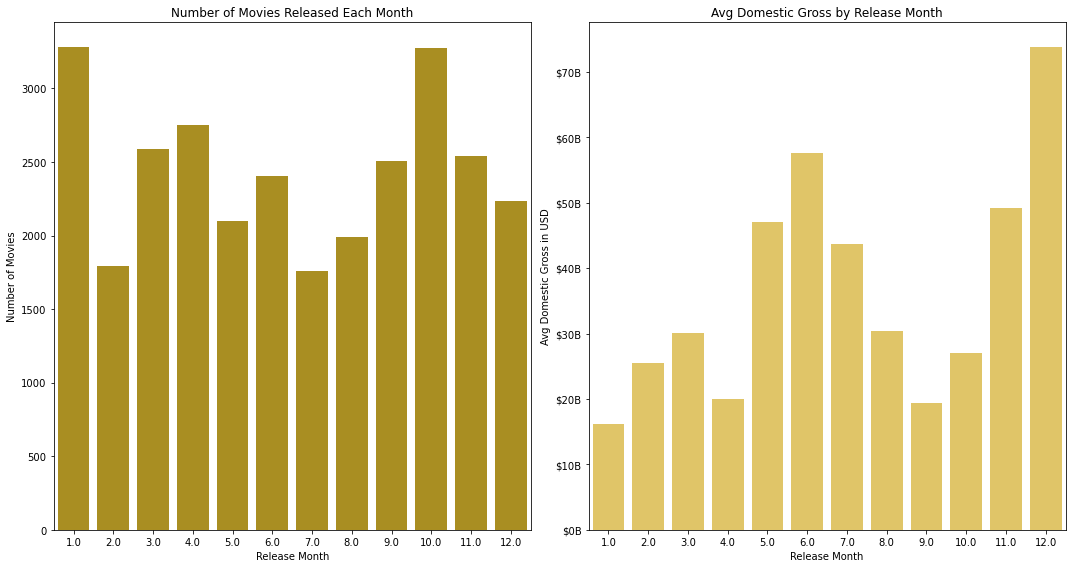

In [79]:
#run the function on release_date_summary
release_month_visual(release_date_summary)

In [80]:
print('Total number of results:', len(top_grossing))
top_grossing

Total number of results: 100


,title,foreign_gross,year,release_date,production_budget,worldwide_gross,avg_domestic_gross,cpi_worldwide_gross,cpi_avg_domestic_gross,cpi_foreign_gross,cpi_production_budget,domestic_profit,domestic_profit_margin,Profit or Loss
6814,gone with the wind,NaN,1939,1939-12-15,3900000.0,3.905252e+08,198680470.0,8.222241e+09,4.183082e+09,NaN,8.211183e+07,4.100970e+09,98.037049,Profit
7293,snow white and the seven dwarfs,NaN,1937,1937-12-21,1488000.0,1.849255e+08,184925486.0,3.758289e+09,3.758289e+09,NaN,3.024102e+07,3.728048e+09,99.195352,Profit
5928,star wars ep. iv: a new hope,NaN,1977,1977-05-25,11000000.0,7.865980e+08,460998007.0,3.798710e+09,2.226293e+09,NaN,5.312219e+07,2.173171e+09,97.613873,Profit
7497,bambi,NaN,1942,1942-08-13,858000.0,2.680000e+08,102797000.0,4.811751e+09,1.845648e+09,NaN,1.540478e+07,1.830243e+09,99.165345,Profit
7073,pinocchio,NaN,1940,1940-02-09,2289247.0,8.430000e+07,84300000.0,1.762201e+09,1.762201e+09,NaN,4.785426e+07,1.714347e+09,97.284405,Profit
7074,fantasia,NaN,1940,1940-11-13,2280000.0,8.332000e+07,83320000.0,1.741715e+09,1.741715e+09,NaN,4.766096e+07,1.694054e+09,97.263562,Profit
5832,the exorcist,NaN,1973,1973-12-26,12000000.0,4.282145e+08,230347346.0,2.822502e+09,1.518295e+09,NaN,7.909595e+07,1.439199e+09,94.790476,Profit
6232,the sound of music,NaN,1965,1965-03-02,8200000.0,2.862143e+08,163214286.0,2.659112e+09,1.516364e+09,NaN,7.618321e+07,1.440181e+09,94.975930,Profit
5831,jaws,NaN,1975,1975-06-20,12000000.0,4.707000e+08,260000000.0,2.560459e+09,1.414318e+09,NaN,6.527621e+07,1.349042e+09,95.384615,Profit
5980,et: the extra-terrestrial,NaN,1982,1982-06-11,10500000.0,7.929653e+08,435110554.0,2.404821e+09,1.319557e+09,NaN,3.184329e+07,1.287714e+09,97.586820,Profit


In [81]:
#create a release_month column
top_grossing['release_month']=pd.DatetimeIndex(top_grossing['release_date']).month

In [82]:
from collections import Counter

def release_month_visual_tg(df):
    # Create a Counter of months from the available data
    months_counter = Counter(df['release_month'])
    print(months_counter)
    # Define all months you want to display
    all_months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

    # Create counts for all months, filling missing months with zero counts
    counts_per_month = {month: months_counter.get(index + 1, 0) for index, month in enumerate(all_months)}
    print(counts_per_month) 
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x=list(counts_per_month.keys()), y=list(counts_per_month.values()),
                     color='goldenrod', label='Number of Movies', ci=None)

    # Set positions and labels for x-axis ticks
    ax.set_xticks(range(len(all_months)))
    ax.set_xticklabels(all_months)

    ax.set_xlabel('Release Month', fontfamily='Arial', fontsize=15)
    ax.set_ylabel('Number of Movies', fontfamily='Arial', fontsize=15)
    ax.set_title('Number of Movies Released Each Month', fontfamily='Arial', fontsize=15)

    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    plt.tight_layout()
    plt.show()


Counter({12.0: 20, 6.0: 17, 5.0: 14, 11.0: 10, 7.0: 10, 2.0: 6, 8.0: 5, 3.0: 5, 10.0: 3, 1.0: 3, 4.0: 2, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
{'JAN': 3, 'FEB': 6, 'MAR': 5, 'APR': 2, 'MAY': 14, 'JUN': 17, 'JUL': 10, 'AUG': 5, 'SEP': 0, 'OCT': 3, 'NOV': 10, 'DEC': 20}


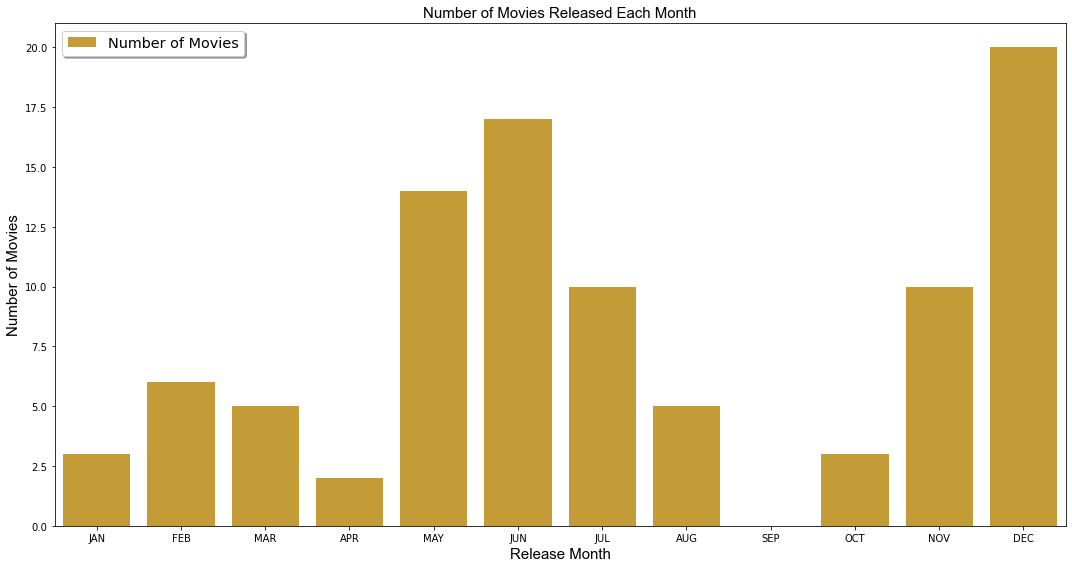

In [83]:
release_month_visual_tg(top_grossing)

This visual somewhat agrees with what was shown previously in that May, June, July, and November/December are the best months to release movies.

### Release Date Summary

This analysis highlights a discernible relationship between the release date and the success of top-grossing movies. It is essential to exercise caution and recognize that additional factors may significantly influence a movie's financial performance. Considerations such as the distribution strategy (wide vs limited release), advertising budget, recognition as a 'movie of the decade,' and the movie's enduring appeal over time are crucial. Moreover, understanding whether a movie is a one-hit wonder or has sustained success is vital. Goals, such as prioritizing substantial revenue in the short term versus building a more enduring success over the long term, further contribute to the complexity of the potential for a film to maximize ROI. Therefore, a comprehensive analysis that incorporates specific factors is essential for a nuanced understanding of the dynamics influencing the financial success of movies is needed to truly forecast the ROI of a new movie.

## Runtime Analysis

Genre can impact the length of a movie. Kid and family films are generally 90 minute while action movies tend to be 120 minutes or longer.

Again focusing on the most profitable genres, it can be determined what the most typical runtimes for each genre should be.

In [84]:
# Create a copy of the DataFrame to avoid altering the original
runtime_analysis = main_df.copy()

# Select specific columns to create a new DataFrame
selected_columns = ['title', 'runtime_minutes', 'cpi_avg_domestic_gross', 'genres']

# Create a new DataFrame with only the selected columns
runtime_summary = runtime_analysis[selected_columns].copy()

# Display the new DataFrame
runtime_summary

,title,runtime_minutes,cpi_avg_domestic_gross,genres
0,sunghursh,175.0,NaN,"Action,Crime,Drama"
1,one day before the rainy season,114.0,NaN,"Biography,Drama"
2,the other side of the wind,122.0,NaN,Drama
3,sabse bada sukh,NaN,NaN,"Comedy,Drama"
4,the wandering soap opera,80.0,NaN,"Comedy,Drama,Fantasy"
...,...,...,...,...
177464,laboratory conditions,NaN,NaN,NaN
177465,_exhibit_84xxx_,NaN,NaN,NaN
177466,the last one,NaN,NaN,NaN
177467,trailer made,NaN,NaN,NaN


In [85]:
#view useful data
runtime_summary[['runtime_minutes', 'title']]

,runtime_minutes,title
0,175.0,sunghursh
1,114.0,one day before the rainy season
2,122.0,the other side of the wind
3,NaN,sabse bada sukh
4,80.0,the wandering soap opera
...,...,...
177464,NaN,laboratory conditions
177465,NaN,_exhibit_84xxx_
177466,NaN,the last one
177467,NaN,trailer made


In [86]:
# Get number of missing values per column
runtime_summary.isna().sum()

title                          0
runtime_minutes            62044
cpi_avg_domestic_gross    169101
genres                     35713
dtype: int64

In [87]:
# % of missing values for runtime
(runtime_summary['runtime_minutes'].isna().sum()/len(runtime_summary)*100).round(2)

35.16

This is significant because runtime is essential in this part of the analysis. The missing values will have to be filled.

In [88]:
# Consider mean
runtime_summary['runtime_minutes'].mean().round(2)

86.19

In [89]:
# Consider median
runtime_summary['runtime_minutes'].median().round(2)

87.0

It is good that both values are about the same. Missing values will be filled with the median of 87 minutes because it is a better option as it is less sensitive to outliers.

In [90]:
# Fill missing values with median
runtime_summary['runtime_minutes'] = runtime_summary['runtime_minutes'].fillna(runtime_summary['runtime_minutes'].median())

In [91]:
# % of missing values for genre
(runtime_summary['genres'].isna().sum()/len(runtime_summary)*100).round(2)


20.24

 Genre has a lower percentage of missing values and is not a critical variable so those rows can be dropped.

In [ ]:
# Drop rows that contain null values
#runtime_summary =runtime_summary.dropna()

In [ ]:
# Check for duplicates
#runtime_summary.duplicated().any()

In [92]:
# Find duplicates
duplicates = runtime_summary[runtime_summary.duplicated()]

# Display duplicates and their counts
duplicate_counts = duplicates.groupby(list(runtime_summary.columns)).size().reset_index(name='Count')
duplicate_counts

,title,runtime_minutes,cpi_avg_domestic_gross,genres,Count


In [93]:
# Check for rows that are exactly identical across all columns
exact_duplicates = runtime_summary.duplicated(keep=False)

# Display the rows with exact duplicates
rows_with_duplicates = runtime_summary[exact_duplicates]
rows_with_duplicates

,title,runtime_minutes,cpi_avg_domestic_gross,genres
583,paradise,87.0,NaN,None
660,the promise,87.0,NaN,Drama
663,the promise,87.0,NaN,Drama
719,a song in the storm,105.0,NaN,Documentary
720,a song in the storm,105.0,NaN,Documentary
...,...,...,...,...
177410,the hug,87.0,NaN,NaN
177430,dark house,87.0,NaN,NaN
177442,parched,87.0,NaN,NaN
177450,recursion,87.0,NaN,NaN


In [99]:
# Identify numeric and non-numeric columns
numeric_columns = runtime_summary.select_dtypes(include='number').columns
non_numeric_columns = runtime_summary.select_dtypes(exclude='number').columns

# Specify aggregation methods for each column
aggregation_methods = {col: 'mean' for col in numeric_columns}
aggregation_methods.update({col: lambda x: x.mode().iloc[0] for col in non_numeric_columns})

# Apply aggregation using agg()
consol_runtime_summary = runtime_summary.groupby('movie_id').agg(aggregation_methods).reset_index(drop=True)


In [ ]:
#joined_data = runtime_summary.groupby('movie_id').max().reset_index()

# Display the joined data
#joined_data


In [100]:
consol_runtime_summary

,runtime_minutes,cpi_avg_domestic_gross,title,genres
0,83.0,NaN,!women art revolution,Documentary
1,87.0,NaN,"""blessed""",None
2,87.0,NaN,"""cherry"" - supreme",None
3,87.0,NaN,"""legitimate rape"" pharmaceutical ad",None
4,87.0,NaN,#1 cheerleader camp,None
...,...,...,...,...
148619,87.0,NaN,纽约客@上海,None
148620,87.0,NaN,마음의 소리 스페셜 1-효! 크러쉬,None
148621,87.0,NaN,번개맨의 비밀,None
148622,87.0,NaN,유병재: b의 농담,None


In [ ]:
# Check if 'title', 'primary_title', and 'original_title' have the same values in each row
same_values = runtime_summary[['title', 'primary_title', 'original_title']].nunique(axis=1) == 1

# Print the result
print(f"All three columns have the {'same' if same_values.all() else 'different'} values in each row.")


In [ ]:
#get statistics for movie runtime
runtime_summary[['original_title', 'runtime_minutes']].describe()

####is this even possible?


In [ ]:
|# Define function to plot, as I plan to plot runtime for various dataframes

def runtime_visual(df,title):
    ''' Creates a Seaborn histplot of runtime_minutes column'''
    plt.figure(figsize=(15, 8))
    sns.histplot(df['runtime_minutes'], kde=True)
    plt.title(title)
    plt.xlabel('Minutes')
    plt.ylabel('Frequency')
    return plt.show()

In [ ]:
def runtime_visual(df, title, plot_range=None):
    ''' Creates a Seaborn histplot of runtime_minutes column within a specified range'''
    plt.figure(figsize=(15, 8))
    
    if plot_range:
        # Filter data within the specified range
        df_filtered = df[(df['runtime_minutes'] >= plot_range[0]) & (df['runtime_minutes'] <= plot_range[1])]
        sns.histplot(df_filtered['runtime_minutes'], kde=True)
        plt.title(f"{title} (Within {plot_range[0]} to {plot_range[1]} Minutes)")
    else:
        sns.histplot(df['runtime_minutes'], kde=True)
        plt.title(title)

    plt.xlabel('Minutes')
    plt.ylabel('Frequency')
    return plt.show()

In [ ]:
# Call runtime_visual function on movies DataFrame
runtime_visual(runtime_summary, 'Runtime distribution', plot_range=(0,200))


The median is approximately 107 minutes

In [ ]:
# Use the Pandas cut method to map the Runtime into the above ranges
runtime_bin_edges = [66, 100, 111, 123, 187]
runtime_bin_names = ['Short', 'Medium', 'Long', ' Very Long']
runtime_summary['runtime_range'] = pd.cut(runtime_summary.runtime_minutes, runtime_bin_edges, labels=runtime_bin_names)
runtime_summary.head()

In [ ]:
# Plot the count of different runtime 
plt.figure(figsize=(15, 8))
ax = runtime_summary.runtime_range.value_counts().plot.bar();
ax.set_ylabel('Movie Count');
ax.set_xlabel('Runtime Ranges')
ax.set_xticklabels(runtime_summary.runtime_range.value_counts().index, rotation = 45);
ax.set_title('Movie Count of each Runtime Range', y=1.02)

Let's see if this pattern follows for the top grossing movies.

In [ ]:
# Set top_grossing_runtime as top 100 movies
top_grossing_runtime = runtime_summary.sort_values('cpi_avg_domestic_gross', ascending = False)[:100]

# Plot the count of different runtimes of top grossing movies 
plt.figure(figsize=(15, 8))
ax = top_grossing_runtime.runtime_range.value_counts().plot.bar();
ax.set_ylabel('Movie Count');
ax.set_xlabel('Runtime Ranges')
ax.set_xticklabels(runtime_summary.runtime_range.value_counts().index, rotation = 45);
ax.set_title('Movie Count of each Runtime Range', y=1.02)

In [ ]:
# Find out which runtime range receives the highest mean gross
runtime_stats = runtime_summary.groupby('runtime_range')['cpi_avg_domestic_gross'].mean()
print('Total number of results:', len(runtime_stats))
runtime_stats

In [ ]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot
runtime_stats = runtime_stats.reset_index()

# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x='runtime_range', y='cpi_avg_domestic_gross', estimator=sum, ci=None, color='#F4D054', data=runtime_stats)
plt.xlabel('Runtime Range')
plt.ylabel('Domestic Gross in USD')
plt.title('Domestic Gross by Runtime Range')

# Define a custom formatter function to display values in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Apply the millions formatter to the y-axis
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()


add run time to the df from movie_basics (runtime_minutes) and rt_movie_info(runtime) - this one may be hard because I have to merge on the director. (above) need to merge some df

Again, let's compare this to the top 100 grossing movies

In [ ]:
# Find out which runtime range receives the highest mean gross
runtime_stats2 = top_grossing_runtime.groupby('runtime_range')['cpi_avg_domestic_gross'].mean()
print('Total number of results:', len(runtime_stats2))
runtime_stats2

In [ ]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot without resetting the index
#runtime_stats2 = runtime_stats2.reset_index(drop=True)


In [ ]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot 
runtime_stats2 = runtime_stats2.reset_index()

# Create the plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='runtime_range', y='cpi_avg_domestic_gross', estimator= sum, ci=None, color='#F4D054', data=runtime_stats2)
plt.xlabel('Runtime Range')
plt.ylabel('Top 100 Movies Domestic Gross in Billions of USD')
plt.title('Domestic Gross by Runtime Range')

def billions_formatter(x, pos):
    """Function to format y-axis labels to display in billions"""
    return f'${x/1e9:.0f}B'
    
# Adjusting the formatting of the y-axis 
formatter = FuncFormatter(billions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
#ax.yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

In [ ]:
# Recreate the DataFrame from the Series to use it in Seaborn's barplot
runtime_stats2 = runtime_stats2.reset_index(drop=True)

# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x='runtime_range', y='cpi_avg_domestic_gross', estimator=sum, ci=None, color='#F4D054', data=runtime_stats2)
plt.xlabel('Runtime Range')
plt.ylabel('Top 100 Movies Domestic Gross in Billion USD')
plt.title('Domestic Gross by Runtime Range')

def billions_formatter(x, pos):
    """Function to format y-axis labels to display in billions"""
    return f'${x/1e9:.0f}'
    
# Adjusting the formatting of the y-axis 
formatter = FuncFormatter(billions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

## Director/Writer Staff Analysis

Good storytelling along with top-notch movie-making skills draws a crowd, which is why talented directors and writers can attract large audiences. 
A good predictor of a successful film can be tied to the consistency of well-known directors and writers on staff and the potential to produce top grossing films at the box office. 

It would be useful to know which directors and writers have the highest box office profits for films. Focusing on the most profitable genres, directors and writers likely to produce a high grossing film can be identified. 

In [ ]:
q='''SELECT name FROM sqlite_schema 
WHERE type = 'table' 
AND name NOT LIKE 'sqlite_%'
ORDER BY 1;'''
df=pd.read_sql(q,conn)
print('Total number of results:', len(df))
df

In [ ]:
q="""
SELECT original_title, start_year, title, person_id, primary_name, birth_year
FROM persons
JOIN directors USING(person_id)
--JOIN writers USING(person_id)
JOIN movie_akas USING(movie_id)
JOIN movie_basics USING(movie_id)
WHERE birth_year is not null
GROUP BY person_id
;
"""
director_df=pd.read_sql(q,conn)
print('Total number of results:', len(director_df))
director_df.head()

In [ ]:
# make a new column job status 
director_df['job_status'] = "director" 
print('Total number of results:', len(director_df))
director_df.head()

In [ ]:
q="""
SELECT original_title, start_year, title, person_id, primary_name, birth_year
FROM persons
JOIN writers USING(person_id)
JOIN movie_akas USING(movie_id)
JOIN movie_basics USING(movie_id)
WHERE birth_year is not null
GROUP BY person_id
;
"""
writer_df=pd.read_sql(q,conn)
print('Total number of results:', len(writer_df))
writer_df.head()

In [ ]:
# make a new column job status 
writer_df['job_status'] = "writer" 
print('Total number of results:', len(writer_df))
writer_df.head()

In [ ]:
#append the director and writer dataframes
talent_analysis = director_df.append(writer_df)
talent_analysis = talent_analysis.sort_values(by='original_title', ascending=False)

print('Total number of results:', len(talent_analysis))
talent_analysis

In [ ]:
talent_analysis.info()

In [ ]:
top_grossing.info()

In [ ]:
top_grossing.duplicated()

In [ ]:
duplicates = top_grossing[top_grossing.duplicated(keep=False) | top_grossing.duplicated(keep='first')]
duplicates.sort_values(by=list(duplicates.columns))

In [ ]:
# Merge the DataFrames on 'original_title'
talent_analysis_t100 = pd.merge(
    top_grossing,
    talent_analysis,
    on = 'original_title',
    how ='inner'
)

print('Total number of results:', len(talent_analysis_t100))
talent_analysis_t100

In [ ]:
# Drop the 'title_y' column
talent_analysis_t100.drop(columns=['title_y'], inplace=True)

# Rename 'title_x' to 'title'
talent_analysis_t100.rename(columns={'title_x': 'title'}, inplace=True)

# Fill NaN or 0.0 cells in column year with value from start_year
#talent_analysis_t100['year'].fillna(talent_analysis_t100['start_year'], inplace=True)

# Drop the 'start_year' column
talent_analysis_t100.drop(columns=['start_year'], inplace=True)

print('Total number of results:', len(talent_analysis_t100))
talent_analysis_t100

In [ ]:
talent_analysis_t100.info()

In [ ]:
# List of all directors who directed top 100 movies 
t100_directors = talent_analysis_t100[talent_analysis_t100['job_status'] == 'director']['primary_name'].value_counts()

# Displaying the directors and the number of films they directed
#print(t100_directors)


# Displaying the director names and the number of films they directed
#for director, count in t100_directors.items():
 #   print(f"Director: {director}, Films Directed: {count}")
t100_directors

In [ ]:
# List of all directors who directed top 100 movies 
t100_writers = talent_analysis_t100[talent_analysis_t100['job_status'] == 'writer']['primary_name'].value_counts()

# Displaying the directors and the number of films they directed
#print(t100_directors)


# Displaying the director names and the number of films they directed
#for director, count in t100_directors.items():
 #   print(f"Director: {director}, Films Directed: {count}")
t100_writers

In [ ]:
# Merge the DataFrames on 'original_title'
all_talent_analysis = pd.merge(
    merged_df2,
    talent_analysis,
    on = 'original_title',
    how ='outer'
)

print('Total number of results:', len(all_talent_analysis))
all_talent_analysis

In [ ]:
# Drop the 'title_y' column
all_talent_analysis.drop(columns=['title_y'], inplace=True)

# Rename 'title_x' to 'title'
all_talent_analysis.rename(columns={'title_x': 'title'}, inplace=True)

print('Total number of results:', len(all_talent_analysis))
all_talent_analysis

In [ ]:
director_data = all_talent_analysis[all_talent_analysis['job_status'] == 'director'].copy()

# Calculate age by subtracting birth_year from the release year
director_data['Age'] = director_data['year'] - director_data['birth_year']

# Grouping data by director names and calculating count and mean 'cpi_worldwide_gross'
director_stats = director_data.groupby('primary_name').agg(
    Films_Directed=('primary_name', 'size'),
    Mean_CPI_Worldwide_Gross=('cpi_worldwide_gross', 'mean')
)

# Calculating average age for each director
director_age = director_data.groupby('primary_name')['Age'].mean().round(1)

# Merging director_stats and director_age DataFrames
director_stats_data = director_stats.merge(director_age, on='primary_name', how='inner')

# Dropping rows where either 'Mean_CPI_Worldwide_Gross' or 'Age' is NaN
director_stats_data.dropna(subset=['Mean_CPI_Worldwide_Gross', 'Age'], inplace=True)

# Sorting the DataFrame by Mean_CPI_Worldwide_Gross in descending order
director_stats_data = director_stats_data.sort_values(by='Mean_CPI_Worldwide_Gross', ascending=False)

# Displaying director statistics
print('Total number of results:', len(director_stats_data))
director_stats_data


In [ ]:
director_stats_data.describe()

In [ ]:
director_data = all_talent_analysis[all_talent_analysis['job_status'] == 'director']

# Calculate age by subtracting birth_year from the release year
director_data['Age'] = director_data['year'] - director_data['birth_year']
# Dropping rows where value is NaN
director_data.dropna(subset=['Age'], inplace=True)

# Grouping data by director names and calculating average age
director_age = director_data.groupby('primary_name')['Age'].mean().round(1)  # Calculate mean age

# Displaying average age of directors
print('Total number of results:', len(director_age))
director_age


In [ ]:
# Plotting average age of directors
#plt.figure(figsize=(15, 8))
#director_age.plot(kind='bar', color='gold')
#plt.title('Average Age of Directors')
#plt.xlabel('Director')
#plt.ylabel('Average Age')
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()


In [ ]:
writer_data = all_talent_analysis[all_talent_analysis['job_status'] == 'writer'].copy()

# Calculate age by subtracting birth_year from the release year
writer_data['Age'] = writer_data['year'] - writer_data['birth_year']

# Grouping data by writer names and calculating count and mean 'cpi_worldwide_gross'
writer_stats = writer_data.groupby('primary_name').agg(
    Films_Written=('primary_name', 'size'),
    Mean_CPI_Worldwide_Gross=('cpi_worldwide_gross', 'mean')
)

# Calculating average age for each writer
writer_age = writer_data.groupby('primary_name')['Age'].mean().round(1)

# Merging writer_stats and writer_age DataFrames
writer_stats_data = writer_stats.merge(writer_age, on='primary_name', how='inner')

# Dropping rows where either 'Mean_CPI_Worldwide_Gross' or 'Age' is NaN
writer_stats_data.dropna(subset=['Mean_CPI_Worldwide_Gross', 'Age'], inplace=True)

# Sorting the DataFrame by Mean_CPI_Worldwide_Gross in descending order
writer_stats_data = writer_stats_data.sort_values(by='Mean_CPI_Worldwide_Gross', ascending=False)

# Displaying writer statistics
print('Total number of results:', len(writer_stats_data))
writer_stats_data

In [ ]:
writer_stats_data.describe()

In [ ]:
#'sand' - #E2CA76
#'light gold' - #FDDC5C
#'maize' - #F4D054
#'goldenrod' - #F9A602
#'macaroni and cheese' - #EFB435
#'gold' - #DBB40C
#'dark gold' - #A58F0D
#'ochre' - #BF9B0C
#'black' - #000000

# Define film company custom color palette using XKCD color names
film_company_palette = sns.xkcd_palette(['sand', 'light gold', 'maize', 'goldenrod', 'macaroni and cheese', 'gold', 'dark gold', 'ochre', 'black'])

# Set the custom palette
sns.set_palette(film_company_palette)
film_company_palette

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Bar chart for Mean CPI Worldwide Gross
writer_stats_data['Mean_CPI_Worldwide_Gross'].head(30).plot(kind='bar', ax=axes[0], color='goldenrod', alpha=0.7, label='Writers')
director_stats_data['Mean_CPI_Worldwide_Gross'].head(30).plot(kind='bar', ax=axes[0], color='#A58F0D', alpha=0.7, label='Directors')
axes[0].set_title('Top 30 Mean CPI Worldwide Gross')
axes[0].set_xlabel('Names')
axes[0].set_ylabel('Mean CPI Worldwide Gross')
axes[0].legend()

# Bar chart for Average Age
writer_stats_data['Age'].head(30).plot(kind='bar', ax=axes[1], color='goldenrod', alpha=0.7, label='Writers')
director_stats_data['Age'].head(30).plot(kind='bar', ax=axes[1], color='#A58F0D', alpha=0.7, label='Directors')
axes[1].set_title('Top 30 Average Age')
axes[1].set_xlabel('Names')
axes[1].set_ylabel('Average Age')
axes[1].legend()

# Adjusting the formatting of the y-axis for the first plot
#formatter = FuncFormatter(billions_formatter)
#ax[0].yaxis.set_major_formatter(formatter)

#def billions_formatter(y, pos):
#    """Function to format y-axis labels to display in billions"""
#    return f'${y/1e9:.0f}B'
    
#Adjusting the formatting of the y-axis 
 #formatter = FuncFormatter(billions_formatter)
 #plt.gca().yaxis.set_major_formatter(formatter)
    
plt.tight_layout()
plt.show()


In [ ]:
writer_stats_data[writer_stats_data['Age']>250]

In [ ]:
# Create subplots with shared x-axis
fig, axes = plt.subplots(2, 1, figsize=(15, 15), sharex=True)

# Scatter plot for Mean CPI Worldwide Gross
axes[0].scatter(writer_stats_data['Mean_CPI_Worldwide_Gross'], writer_stats_data['Age'], color='goldenrod', label='Writers', marker='o')
axes[0].set_ylabel('Average Age')
axes[0].set_title('Mean CPI Worldwide Gross vs Average Age')
axes[0].legend()

# Scatter plot for directors
axes[1].scatter(director_stats_data['Mean_CPI_Worldwide_Gross'], director_stats_data['Age'], color='#A58F0D', label='Directors', marker='x')
axes[1].set_xlabel('Mean CPI Worldwide Gross')
axes[1].set_ylabel('Average Age')
axes[1].legend()

#def billions_formatter(x, pos):
#    """Function to format y-axis labels to display in billions"""
#    return f'${x/1e9:.0f}B'
    
# Adjusting the formatting of the y-axis 
#formatter = FuncFormatter(billions_formatter)
#plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


In [ ]:
# Group by writer and director combinations and aggregate the movies they worked on
talent_teams = all_talent_analysis.groupby(['job_status', 'primary_name']).agg({'title': list}).reset_index()

# Filter teams that worked together on multiple movies
multiple_movie_teams = talent_teams[talent_teams['title'].apply(len) > 1]

# Prepare a new DataFrame to display team names, movie titles, and gross earnings
movie_team = []
for index, row in multiple_movie_teams.iterrows():
    for movie in row['title']:
        filtered_data = all_talent_analysis[(all_talent_analysis['job_status'] == row['job_status']) & (all_talent_analysis['primary_name'] == row['primary_name']) & (all_talent_analysis['title'] == movie)]
        if not filtered_data.empty:
           gross = all_talent_analysis[(all_talent_analysis['job_status'] == row['job_status']) & (all_talent_analysis['primary_name'] == row['primary_name']) & (all_talent_analysis['title'] == movie)]['cpi_worldwide_gross'].iloc[0]
           movie_team.append([row['primary_name'], row['job_status'], movie, gross])

movie_team_df = pd.DataFrame(movie_team, columns=['Team Member', 'Job Status', 'Movie Title', 'cpi_worldwide_gross'])

# Sort the DataFrame by decreasing cpi_worldwide_gross
sorted_team_table = movie_team_df.sort_values(by='cpi_worldwide_gross', ascending=False).drop_duplicates()

# Display the table
print('Total number of results:', len(sorted_team_table))
sorted_team_table


In [ ]:
# Filter the dataset for rows where a person is both a director and a writer
director_writer = all_talent_analysis[
    (all_talent_analysis['job_status'] == 'director') &
    (all_talent_analysis['primary_name'].isin(
        all_talent_analysis[all_talent_analysis['job_status'] == 'writer']['primary_name'])
    )
]

# Get the number of unique movie titles for the above condition
director_writer_titles_count = len(director_writer['title'].unique())

# Get the list of movie titles where a director is also listed as a writer
director_writer_titles_list = director_writer.groupby('title').agg({'cpi_worldwide_gross': 'median'}).reset_index()
director_writer_titles_list = director_writer_titles_list.sort_values(by='cpi_worldwide_gross', ascending=False)

print(f"The number of movie titles where a director is also listed as a writer is: {director_writer_titles_count}")
print("\nList of movie titles with cpi_worldwide_gross:")
director_writer_titles_list


In [ ]:
director_writer.groupby('title').agg({'cpi_worldwide_gross': 'sum'})

In [ ]:
specific_movie = all_talent_analysis[all_talent_analysis['title'] == '127 Hours']

# Get the CPI Worldwide Gross for the specific movie
cpi_127_hours = specific_movie['cpi_worldwide_gross'].iloc[0]
print(f"The CPI Worldwide Gross for '127 Hours' is: {cpi_127_hours}")

specific_movie2 = all_talent_analysis[all_talent_analysis['title'] == 'Alice in Wonderland']

# Get the CPI Worldwide Gross for the specific movie
cpi_alice = specific_movie2['cpi_worldwide_gross'].iloc[0]
print(f"The CPI Worldwide Gross for 'Alice in Wonderland' is: {cpi_alice}")


In [ ]:
# Filter the dataset for rows where a person is both a director and a writer
director_writer = all_talent_analysis[
    (all_talent_analysis['job_status'] == 'director') &
    (all_talent_analysis['primary_name'].isin(
        all_talent_analysis[all_talent_analysis['job_status'] == 'writer']['primary_name'])
    )
]

# Get the number of unique movie titles for the above condition
director_writer_titles_count = len(director_writer['title'].unique())

# Get the list of movie titles where a director is also listed as a writer
director_writer_titles_list = director_writer.groupby('title').agg({'cpi_worldwide_gross': 'median'}).reset_index()
director_writer_titles_list = director_writer_titles_list.sort_values(by='cpi_worldwide_gross', ascending=False)

print(f"The number of movie titles where a director is also listed as a writer is: {director_writer_titles_count}")
print("\nList of movie titles with cpi_worldwide_gross:")
director_writer_titles_list


In [ ]:
top_30_t100['cpi_worldwide_gross']

In [ ]:
top_30_director_writer['cpi_worldwide_gross']

In [ ]:
# Assigning x-axis positions for bars
x = np.arange(len(top_30_t100))

# Bar width
bar_width = 0.35

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting the top 30 movies from talent_analysis_t100
ax.bar(x - bar_width/2, top_30_t100['cpi_worldwide_gross'], bar_width, color='#A58F0D', alpha=0.7, label='Top 30 from talent_analysis_t100')

# Plotting the top 30 movies from director_writer_titles_list side by side
ax.bar(x + bar_width/2, top_30_director_writer['cpi_worldwide_gross'], bar_width, color='goldenrod', alpha=0.7, label='Top 30 from director_writer_titles_list')

# Set plot labels and legend
ax.set_xticks(x)
ax.set_xticklabels(top_30_t100['title'], rotation=90)  # Assuming 'title' is the movie title column
ax.set_xlabel('Title')
ax.set_ylabel('CPI Worldwide Gross')
ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(10, 15))

# Plotting the top 30 movies from talent_analysis_t100
ax.barh(top_30_t100['title'], top_30_t100['cpi_worldwide_gross'], color='#A58F0D', alpha=0.7, label='Top 30 from talent_analysis_t100')

# Plotting the top 30 movies from director_writer_titles_list
ax.barh(top_30_director_writer['title'], top_30_director_writer['cpi_worldwide_gross'], color='goldenrod', alpha=0.7, label='Top 30 from director_writer_titles_list')

# Set plot labels and legend
ax.set_xlabel('CPI Worldwide Gross')
ax.set_ylabel('Title')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Create a figure and subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Get the top 30 movies from talent_analysis_t100
#top_30_t100 = talent_analysis_t100.head(30)['title'].unique()

# Filter the talent_analysis_t100 DataFrame to include only the top 30 unique movies
filtered_t100 = talent_analysis_t100[talent_analysis_t100['title'].isin(top_30_t100)]

# Plotting the top 30 movies from talent_analysis_t100
#top_30_t100.plot(kind='bar', x='title', y='cpi_worldwide_gross', ax=ax, color='#A58F0D', alpha=0.7, label='All Time Top Grossing')

# Filter movies from director_writer_titles_list that are also in top 30_t100
overlap_movies = director_writer_titles_list[director_writer_titles_list['title'].isin(filtered_t100['title'])]

# Plotting the overlapping movies
overlap_movies.plot(kind='bar', x='title', y='cpi_worldwide_gross', ax=ax, color='goldenrod', alpha=0.7, label='Overlapping Movies')

# Set plot labels and legend
ax.set_title('Comparison of Top 30 Movies')
ax.set_xlabel('Title')
ax.set_ylabel('CPI Worldwide Gross')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Create a figure and subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting the top 30 movies from talent_analysis_t100
filtered_t100.plot(kind='bar', x='title', y='cpi_worldwide_gross', ax=ax, color='#A58F0D', alpha=0.7, label='All Time Top Grossing')

# Filter movies from director_writer_titles_list that are also in filtered_t100
overlap_movies = director_writer_titles_list[director_writer_titles_list['title'].isin(filtered_t100['title'])]

# Plotting the overlapping movies
overlap_movies.plot(kind='bar', x='title', y='cpi_worldwide_gross', ax=ax, color='goldenrod', alpha=0.7, label='Overlapping Movies')

# Set plot labels and legend
ax.set_title('Comparison of Top 30 Movies')
ax.set_xlabel('Title')
ax.set_ylabel('CPI Worldwide Gross')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
talent_age_data = all_talent_analysis.copy()

# Calculate age by subtracting birth_year from the release year
talent_age_data['Age'] = talent_age_data['year'] - talent_age_data['birth_year']

# Grouping data by movie names and calculating count and mean 'cpi_worldwide_gross'
talent_age_stats = talent_age_data.groupby('primary_name').agg(
    Film_Teams=('title', 'size'),
    Mean_CPI_Worldwide_Gross=('cpi_worldwide_gross', 'mean')
)

# Calculating average age for each team
team_age = talent_age_data.groupby('primary_name')['Age'].mean().round(1)

# Merging writer_stats and writer_age DataFrames
team_stats_data = talent_age_stats.merge(team_age, on='primary_name', how='inner')

# Dropping rows where either 'Mean_CPI_Worldwide_Gross' or 'Age' is NaN
team_stats_data.dropna(subset=['Mean_CPI_Worldwide_Gross', 'Age'], inplace=True)

# Sorting the DataFrame by Mean_CPI_Worldwide_Gross in descending order
team_stats_data = team_stats_data.sort_values(by='Mean_CPI_Worldwide_Gross', ascending=False)

# Displaying writer statistics
print('Total number of results:', len(team_stats_data))
team_stats_data

In [ ]:
# Calculate age by subtracting birth_year from the release year
all_talent_analysis['Age'] = all_talent_analysis['year'] - all_talent_analysis['birth_year']

# Filter rows where age is between 18 and 100
filtered_ages = all_talent_analysis[(all_talent_analysis['Age'] >= 18) & (all_talent_analysis['Age'] <= 100)]

# Grouping data by movie titles and calculating mean age
grouped_ages = filtered_ages.groupby('title').agg({'Age': 'mean', 'cpi_worldwide_gross': 'first'}).reset_index()


# Sorting the DataFrame by cpi_worldwide_gross in descending order
talent_age_data2 = grouped_ages.sort_values(by='cpi_worldwide_gross', ascending=False)

# Displaying mean age, title, and cpi_worldwide_gross
print('Total number of results:', len(talent_age_data2))
talent_age_data2[['Age', 'title', 'cpi_worldwide_gross']]


In [ ]:
# Check for duplicate rows in the DataFrame
duplicate_rows = talent_age_data2[talent_age_data2.duplicated()]

# Displaying duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

In [ ]:
# Grouping data by movie titles and counting the number of unique writers and directors
team_counts = all_talent_analysis.groupby('title')['primary_name'].nunique().reset_index()
team_counts['team_size'] = team_counts['primary_name']  # Renaming the column for team_size

# Merging with cpi_worldwide_gross data
merged_team_counts = pd.merge(team_counts[['title', 'team_size']], all_talent_analysis[['title', 'cpi_worldwide_gross']].drop_duplicates(), on='title')

# Sorting the data by cpi_worldwide_gross in descending order
ranked_team_counts = merged_team_counts.sort_values(by='cpi_worldwide_gross', ascending=False)

# Drop rows where 'team_size' is NaN or 0
ranked_team_counts = ranked_team_counts.dropna(subset=['team_size'])  # Drop NaN values
ranked_team_counts = ranked_team_counts[ranked_team_counts['team_size'] != 0]  # Drop 0 values

# Displaying the results
print('Total number of results:', len(ranked_team_counts))
ranked_team_counts


In [ ]:
# Sort the DataFrame by cpi_worldwide_gross in descending order
sorted_by_gross = talent_age_data2.sort_values(by='cpi_worldwide_gross', ascending=False)

# Select the top 30 films based on cpi_worldwide_gross
top_30_films = sorted_by_gross.head(30)

# Calculate the average team size for the top 30 films
average_team_size = top_30_films['title'].apply(lambda x: all_talent_analysis[all_talent_analysis['title'] == x]['primary_name'].nunique()).mean()

# Displaying the results
print(f"Average team size for the top 30 films: {average_team_size:.2f}")

# Calculate team sizes for the top 30 films
team_sizes = top_30_films['title'].apply(lambda x: all_talent_analysis[all_talent_analysis['title'] == x]['primary_name'].nunique())

# Count occurrences of each team size
team_size_counts = team_sizes.value_counts().sort_index()

# Displaying the results
print("Count of team sizes in the top 30 films:", len(ranked_team_counts))
team_size_counts


In [ ]:
# Access the 'writers' DataFrame from the SQL_dataframes dictionary
#writers_df = SQL_dataframes['writers']

# Create a copy of the DataFrame to avoid altering the original
#writers_dfc = writers_df.copy()

# Access the 'directors' DataFrame from the SQL_dataframes dictionary
#directors_df = SQL_dataframes['directors']

# Create a copy of the DataFrame to avoid altering the original
#directors_dfc = directors_df.copy()

# Access the 'writers' DataFrame from the SQL_dataframes dictionary
#persons_df = SQL_dataframes['persons']

# Create a copy of the DataFrame to avoid altering the original
#persons_dfc = persons_df.copy()

xdfcs = [writers_dfc, directors_dfc, persons_dfc]

#from functools import reduce

#merge tables 
#dw_analysis = reduce (lambda left, right: pd.merge(left, right, on = 'person_id', how = 'outer'),dfcs).drop_duplicates()
# Drop duplicates
#dw_analysis = dw_analysis.drop_duplicates()

#dw_analysis = reduce (lambda left, right: pd.merge(left, right, on = 'person_id', how = 'outer')merge.dfcs.drop_duplicates())
#dw_analysis = dw_analysis.drop(columns = ["birth_year", "death_year", "primary_profession"])
#use "ww_profit" column

#remove production_budget and worldwide_gross columns
#dw_roi = dw_roi.drop(columns = ["production_budget", "worldwide_gross"])

#separate genres
#dw_roi["genres"] = dw_roi["genres"].apply(lambda x: str(x).split(","))
#dw_roi = dw_roi.explode('genres')

#remove rows missing data for ROI and director, remove rows that do not contain directors
#dw_roi = dw_roi.dropna(subset = ["roi", "director"])
#dw_roi = dw_roi[dw_roi["primary_profession"].str.contains("director")==True]
#dw_roi = dw_roi.drop(columns=["primary_profession"])

#sort by genre
#dw_roi = dw_roi.sort_values(by=["genres", "roi"], ascending = False)
#print('Total number of results:', len(dw_analysis))
dw_analysis

In [ ]:
# Calculate the number of movies directed by each director 
dw_analysis.Director.value_counts().head(10)

In [ ]:
#calculate the age of the directors at the time of movie release
# Sample DataFrame
data = {
    'Director': ['directors_dfc'],
    'Release_Year': ['dw_analysis'],
    'Birth_Year': ['dw_analysis']
}

df = pd.DataFrame(data)

# Calculate director's age at the time of movie release
df['Director_Age_at_Release'] = df['Release_Year'] - df['Birth_Year']


In [ ]:
# Assuming 'top_100_movies' DataFrame with columns 'ww_gross' and 'Director_Age_at_Release'

# Convert gross revenue to billions for better readability
top_100_movies['Gross_in_Billions'] = top_100_movies['ww_gross'] / 1e9  # Dividing by 1 billion

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(top_100_movies['Director_Age_at_Release'], top_100_movies['Gross_in_Billions'], color='orange', alpha=0.7)
plt.title('Director Age vs Worldwide Gross Revenue')
plt.xlabel('Director Age at Release')
plt.ylabel('Worldwide Gross Revenue (in Billions)')
plt.grid(True)
plt.show()


In [ ]:
#are some writer - director teams more profitable?

# Assuming 'movies' DataFrame with columns 'Director', 'Writer', and 'ww_gross'

# Group by Director and Writer to find combinations and their frequencies
director_writer_teams = dw_analysis.groupby(['Director', 'Writer']).size().reset_index(name='Frequency')

# Aggregate worldwide gross for each director-writer team
director_writer_teams['Total_Worldwide_Gross'] = dw_analysis.groupby(['Director', 'Writer'])['ww_gross'].sum().reset_index(drop=True)

# Sort by Total_Worldwide_Gross to find the most profitable teams
sorted_teams = director_writer_teams.sort_values(by='Total_Worldwide_Gross', ascending=False)

# Display or further analyze the sorted_teams DataFrame
print(sorted_teams)


do I consider year or month of release along with the team? are there teams that have multiple hits? 

In [ ]:
# Find out the top 5 directors by Revenue
#revenue_directors = dw_analysis.groupby('Director').agg({'Revenue': 'mean', 'Rank': 'count'})
#top_5_revenue_directors = revenue_directors.rename(columns={'Rank': 'Movies Count'}).sort_values('Revenue', ascending=False)[:5]
#top_5_revenue_directors

In [ ]:
# Plot the result
#ax = top_5_revenue_directors['Revenue'].plot.bar();
#ax.set_ylabel('Revenue in Millions')
#ax.set_title('Average Revenue of Top 5 Directors by Revenue', y=1.02)
#ax.set_xticklabels(top_5_revenue_directors.index, rotation = 45);

In [ ]:
# Close the database connection
conn.close()

limitations: 
    1. Actors play a huge role in drawing people to the theater
    2. advestising 
    3. streaming releases
    4. limited theater releases/ cost to theater
    

## References
1. https://pypi.org/project/cpi/#description (CPI)
2. https://sqlite.org/forum/forumpost/2ca63507ad(PRAGMA table)
3. https://stackoverflow.com/questions/24258878/how-to-split-comma-separated-values/32051164#32051164 (SQL split comma separated values)
4. https://www.youtube.com/watch?v=Ohj-CqALrwk (SQL database backend)
5. https://www.youtube.com/watch?v=E-BEOD0EPDA (dataframe -> SQL migration)
6. https://www.sqlitetutorial.net/sqlite-import-csv/ (import CSV to SQL)
7. https://www.youtube.com/watch?v=YyUknBHcZB8 (pandas -> SQL)
8. https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around (glob)
9. https://help.highbond.com/helpdocs/analytics/141/scripting-guide/en-us/Content/lang_ref/functions/r_exclude.htm(exclude function)
10. https://www.geeksforgeeks.org/difference-between-list-and-dictionary-in-python/(list and dictionary background)
11. https://www.youtube.com/watch?v=tATFQUx0Zx0 (more glob)
12. https://developer.imdb.com/non-commercial-datasets/ (IMBd data)
13. https://www.youtube.com/watch?v=THHwJcKfGLQ (tsv -> csv)
14. https://www.pythonpool.com/python-scientific-notation/(number to words coverter)
15. https://www.youtube.com/watch?v=inmMGhYU3uU (reset index)
16. https://www.youtube.com/watch?v=xOoCd5VBzXw(project set up)
17. https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee(movie database support)
18. https://learnsql.com/blog/learn-and-practice-sql-joins/(SQL joins)
19. https://xkcd.com/color/rgb/(xkcd color codes)
20. https://github.com/kimfetti/Videos/blob/master/Seaborn/26_palettes.ipynb(seaborn color codes)
21. https://www.youtube.com/watch?v=Eg0NJcUWLRM(all color codes)
22. https://seaborn.pydata.org/tutorial/color_palettes.html (seaborn pallets)
23. https://gizmodo.com/how-much-money-does-a-movie-need-to-make-to-be-profitab-5747305 (movie article)
24. https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas (join and merge differences PANDAS)
https://smallbusiness.chron.com/difference-between-profit-profit-margin-1595.html (profit vs profit margin)
https://learngitbranching.js.org/ (visualizing git) 